In [1]:
#Library Pengolahan Data
import numpy as np
import pandas as pd

#Library Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

#Library Split Test dan Train
from sklearn.model_selection import train_test_split

#Library Scaling dan Encoding 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OrdinalEncoder

#Library Model
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier


#Library Parameter Tuning
from sklearn.model_selection import GridSearchCV

#Library Evaluasi
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score #untuk membuat dataframe evaluasi, agar lebih mudah membandingkan
from sklearn.metrics import recall_score, f1_score, precision_score #untuk membuat dataframe evaluasi, agar lebih mudah membandingkan


#Library Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

#Library Saving Model
import pickle 
import json



In [2]:
#Import data syntax pd.read_csv kemudian assign ke variabel 'df' agar memudahkan pemanggilan
df = pd.read_csv('h8dsft_P1M1_evan_derin_ihsanudin.csv')

In [3]:
#Menampilkan 10 data teratas
pd.set_option('display.max_columns', 500) 
df.head(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
3,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
4,230000,1,1,1,48,0,0,0,0,0,0,160879,161797,165107,105508,108101,110094,7000,6607,3773,4290,4164,2000,0
5,500000,1,2,1,41,0,0,0,0,0,0,155820,171565,184782,152365,139757,153348,20000,20241,20154,20019,20151,20037,0
6,50000,1,2,1,40,0,0,0,0,0,0,49073,49531,44002,44356,19344,19354,1691,1942,1296,674,693,1000,0
7,100000,1,5,1,45,0,0,0,0,0,0,94502,95697,98222,90500,82586,22620,5000,5000,3203,2103,50000,0,0
8,140000,1,2,1,29,0,0,0,0,0,0,130767,134946,130470,132038,131961,124256,6696,5000,4866,5300,5055,5000,0
9,50000,1,2,1,43,0,0,0,0,0,0,48919,48775,48731,48934,29116,28999,1800,2200,1400,582,580,30000,0


In [4]:
#Menampilkan 10 data terakhir
df.tail(10)

,limit_balance,sex,education_level,marital_status,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
2955,300000,2,2,1,28,-1,-1,-1,-1,-2,-2,16666,1000,16666,0,0,0,1000,16666,0,0,0,0,0
2956,200000,2,1,1,49,-1,-1,-1,-1,-2,-2,413,0,103,0,0,0,0,103,0,0,0,225,0
2957,50000,2,1,2,31,-1,0,-1,-1,-1,-2,12725,34526,12787,3995,0,0,30018,12787,3995,0,0,0,0
2958,50000,2,1,2,25,-1,-1,2,-1,-1,-2,13572,17983,15590,10610,0,0,5000,200,10610,0,0,0,0
2959,100000,2,1,2,37,-1,-1,0,-1,-1,-2,1725,21711,10487,780,0,0,21711,1000,780,0,0,0,0
2960,30000,2,3,2,50,-1,-1,2,-1,-1,-2,178,1860,940,1110,0,0,1860,0,1110,0,0,0,1
2961,20000,2,1,2,25,-1,-1,-1,-1,-1,-2,2650,0,855,640,0,0,0,855,640,0,0,2742,0
2962,280000,2,1,2,52,-1,-1,-1,-1,-2,-2,886,0,930,0,0,0,0,930,0,0,0,0,0
2963,360000,2,2,2,26,-1,-1,-1,-1,-2,-2,1968,459,2500,0,0,0,463,2500,0,0,0,0,0
2964,100000,2,1,2,30,-1,-1,-1,-1,-2,-2,430,35993,2772,0,0,0,35993,2772,0,0,0,0,0


In [5]:
#Pengecekan null values
df.isnull().sum()

limit_balance                 0
sex                           0
education_level               0
marital_status                0
age                           0
pay_0                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt_1                    0
bill_amt_2                    0
bill_amt_3                    0
bill_amt_4                    0
bill_amt_5                    0
bill_amt_6                    0
pay_amt_1                     0
pay_amt_2                     0
pay_amt_3                     0
pay_amt_4                     0
pay_amt_5                     0
pay_amt_6                     0
default_payment_next_month    0
dtype: int64

In [6]:
#Mengecek informasi dataset dengan .info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   limit_balance               2965 non-null   int64
 1   sex                         2965 non-null   int64
 2   education_level             2965 non-null   int64
 3   marital_status              2965 non-null   int64
 4   age                         2965 non-null   int64
 5   pay_0                       2965 non-null   int64
 6   pay_2                       2965 non-null   int64
 7   pay_3                       2965 non-null   int64
 8   pay_4                       2965 non-null   int64
 9   pay_5                       2965 non-null   int64
 10  pay_6                       2965 non-null   int64
 11  bill_amt_1                  2965 non-null   int64
 12  bill_amt_2                  2965 non-null   int64
 13  bill_amt_3                  2965 non-null   int64
 14  bill_amt

Terdapat perbedaan informasi dataset dari *syntax* .info dengan informasi pada `BigQuery`. Dari *syntax* .info semua *feature* dianggap sebagai `int64` akan tetapi ada beberapa *feature* yang sudah ter-encode dari *source*. Berikut informasi dataset dari `BigQuery`  :

*Numerical* :

- `limit_balance` -> limit dari *credit card*
- `age`
- All `bill_amt` -> *bill* yang ditagihkan ke *customer* pada periode April 2005 - September 2005
- All `pay_amt` -> jumlah *payment* yang dibayarkan sebelumnya oleh *customer* pada periode April 2005 - September 2005

*Categorical Nominal* :

- `sex` -> Gender (1=male, 2=female)
- `marital_status` -> Marital status (1=married, 2=single, 3=others)
- `default_payment_next_month` -> Default payment (1=yes, 0=no)

*Categorical Ordinal* :

- `education_level` -> Education Level (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- All `pay` -> Repayment status (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above) pada April 2005 - September 2005


In [7]:
#Rename kolom pay_0 menjadi pay_1 untuk memudahkan pemahaman pasangan dengan bill dan pay amount
df.rename(columns={'pay_0' : 'pay_1'}, inplace=True)
df

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6,default_payment_next_month
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291,0
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226,1
2,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698,0
3,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509,0
4,230000,1,1,1,48,0,0,0,0,0,0,160879,161797,165107,105508,108101,110094,7000,6607,3773,4290,4164,2000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000,2,3,2,50,-1,-1,2,-1,-1,-2,178,1860,940,1110,0,0,1860,0,1110,0,0,0,1
2961,20000,2,1,2,25,-1,-1,-1,-1,-1,-2,2650,0,855,640,0,0,0,855,640,0,0,2742,0
2962,280000,2,1,2,52,-1,-1,-1,-1,-2,-2,886,0,930,0,0,0,0,930,0,0,0,0,0
2963,360000,2,2,2,26,-1,-1,-1,-1,-2,-2,1968,459,2500,0,0,0,463,2500,0,0,0,0,0


Dari informasi diatas dapat disimpulkan bahwa :

- Dataset memiliki **2965 data** dan **24 *feature***
- Dataset memiliki 14 *feature numeric*, 3 *feature categorical nominal* dan 7 *feature categorical ordinal*
- Tidak terdapat *null values* pada seluruh *feature*
- Dari informasi *dataset* pada `BigQuery`, ada beberapa *categorical feature* yang tercatat sebagai *integer* karena sudah ter-encoding dari *data source* nya


In [8]:
#Copy dataset ke variabel df_eda
df_eda = df.copy()

In [9]:
# Memisahkan kolom numerical dan categorical

df_num_columns = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']
df_cat_columns = ['sex','education_level','marital_status','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','default_payment_next_month']
print('Num Columns : ', df_num_columns)
print('Cat Columns : ', df_cat_columns)

Num Columns :  ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat Columns :  ['sex', 'education_level', 'marital_status', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'default_payment_next_month']


In [10]:
#Mengecek statistik dasar dengan syntax .describe
df[df_num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2965.0,163369.308600,125030.415472,10000.0,50000.0,140000.0,230000.0,800000.0
age,2965.0,35.193255,9.109439,21.0,28.0,34.0,41.0,69.0
bill_amt_1,2965.0,52118.305228,72328.670541,-11545.0,3958.0,24257.0,69852.0,613860.0
bill_amt_2,2965.0,50649.153120,70785.001588,-67526.0,3390.0,23111.0,67827.0,512650.0
bill_amt_3,2965.0,48239.757504,68145.710745,-25443.0,3302.0,21520.0,63023.0,578971.0
bill_amt_4,2965.0,44089.683305,61907.454056,-46627.0,2582.0,19894.0,58622.0,488808.0
bill_amt_5,2965.0,40956.080607,58271.904751,-46627.0,1958.0,18814.0,53373.0,441981.0
bill_amt_6,2965.0,39773.072513,57303.488981,-73895.0,1430.0,18508.0,52287.0,436172.0
pay_amt_1,2965.0,6348.902867,20885.735336,0.0,1013.0,2234.0,5087.0,493358.0
pay_amt_2,2965.0,6272.494435,28879.674534,0.0,990.0,2175.0,5000.0,1227082.0


Dari informasi diatas dapat disimpulkan bahwa :

*Demographic Customer*

- *Customer* memiliki `limit_balance` rata-rata **163.369** dengan rentang  **10.000 - 800.000**
- *Customer* memiliki `age` rata-rata **35** tahun dengan rentang  **21 - 69** tahun

*Bill Amount Customer* **(Review /3 bulan)**

- Pada Juli - September 2005, rata-rata *bill* yang tersisa adalah sekitar **48.239-52.118** dengan jumlah maksimal yaitu **613.860** pada bulan September
- Pada April - Juni 2005, rata-rata *bill* yang tersisa adalah sekitar **39.773-44.089** dengan jumlah maksimal yaitu **488.808** pada bulan Juni 
- Secara *overall* rata-rata *bill* yang tersisa dan jumlah maksimal *bill* terus meningkat dari April-September 2005. Hal ini **kemungkinan** disebabkan karena jumlah *customer* bertambah atau bisa juga disebabkan karena *customer* yang menunggak semakin bertambah. Hal ini akan kita *explore* lebih jauh lagi pada EDA.

*Historical Pay Amount* **(Review /3 bulan)**

- Pada Juli - September 2005, rata-rata *pay amount historical* adalah sekitar **5.150-6.348** dengan jumlah maksimal yaitu **1.227.082** pada bulan Agustus
- Pada April - Juni 2005, rata-rata *pay amount historical* adalah sekitar **4.561-5.382** dengan jumlah maksimal yaitu **403.500** pada bulan April
- Secara *overall* untuk rata-rata *pay amount historical* tidak meningkat secara signifikan dari April-September 2005. Kemudian jika dibandingkan dengan *Bill*, maka nilai *pay amount historical* memiliki nilai yang lebih kecil. Artinya ada kemungkinan *customer* banyak membayar tepat pada jatuh tempo atau banyak *customer* yang menunggak. Hal ini akan kita *explore* lebih jauh lagi pada EDA.


In [11]:
#Membuat bins dari limit balance
df_eda['limit_bin'] = pd.cut(df_eda['limit_balance'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1000000])
print(df_eda['limit_bin'].value_counts().sort_values(ascending=False))

(5000, 50000]        771
(200000, 300000]     522
(50000, 100000]      483
(100000, 150000]     408
(150000, 200000]     373
(300000, 400000]     258
(400000, 500000]     136
(500000, 1000000]     14
Name: limit_bin, dtype: int64


In [12]:
#print % class credit default pada limit balance
df_eda['default_payment_next_month'].groupby(df_eda['limit_bin']).value_counts(normalize = True)

limit_bin          default_payment_next_month
(5000, 50000]      0                             0.690013
                   1                             0.309987
(50000, 100000]    0                             0.749482
                   1                             0.250518
(100000, 150000]   0                             0.791667
                   1                             0.208333
(150000, 200000]   0                             0.852547
                   1                             0.147453
(200000, 300000]   0                             0.839080
                   1                             0.160920
(300000, 400000]   0                             0.837209
                   1                             0.162791
(400000, 500000]   0                             0.933824
                   1                             0.066176
(500000, 1000000]  0                             1.000000
Name: default_payment_next_month, dtype: float64

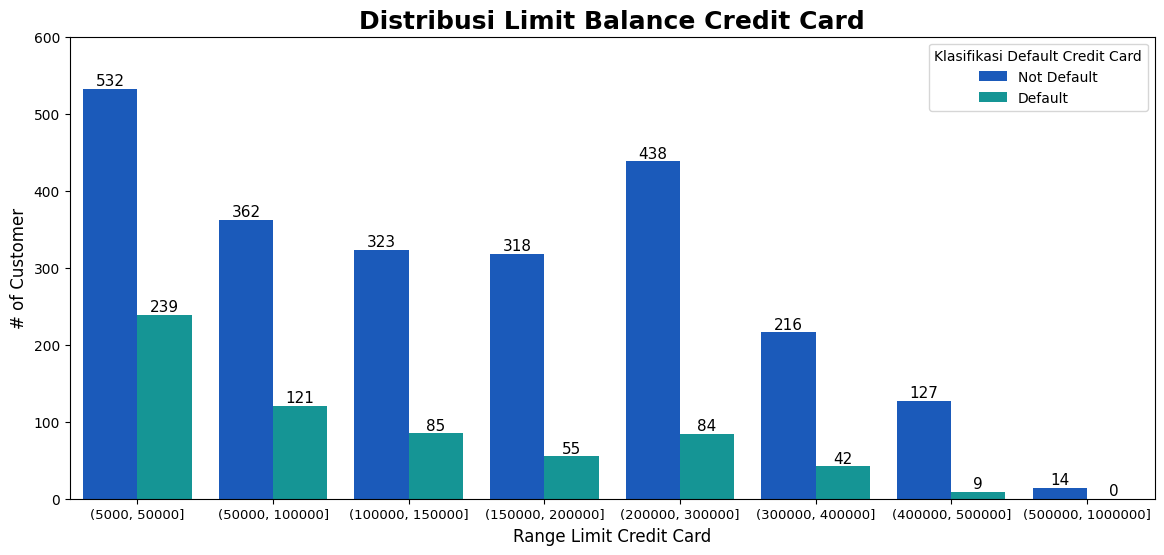

In [13]:
# Membuat  visualisasi distribusi limit balance berdasarkan range bins dan klasifikasi credit card
plt.figure(figsize=(14,6))

df_eda['limit_bin'] = df_eda['limit_bin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1000000]']

ax = sns.countplot(data = df_eda, x = 'limit_bin', hue="default_payment_next_month", palette = 'winter', order = LimitBin_order)

plt.title('Distribusi Limit Balance Credit Card', fontsize=18, fontweight='bold')
plt.xlabel("Range Limit Credit Card", fontsize= 12)
plt.ylabel("# of Customer", fontsize= 12)
ax.tick_params(axis="x", labelsize= 9.5)
plt.legend(fontsize=10,title='Klasifikasi Default Credit Card', loc='upper right', labels=['Not Default', 'Default'])
plt.ylim(0,600)
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+10), ha='center', va='center',fontsize = 11) 

plt.show()

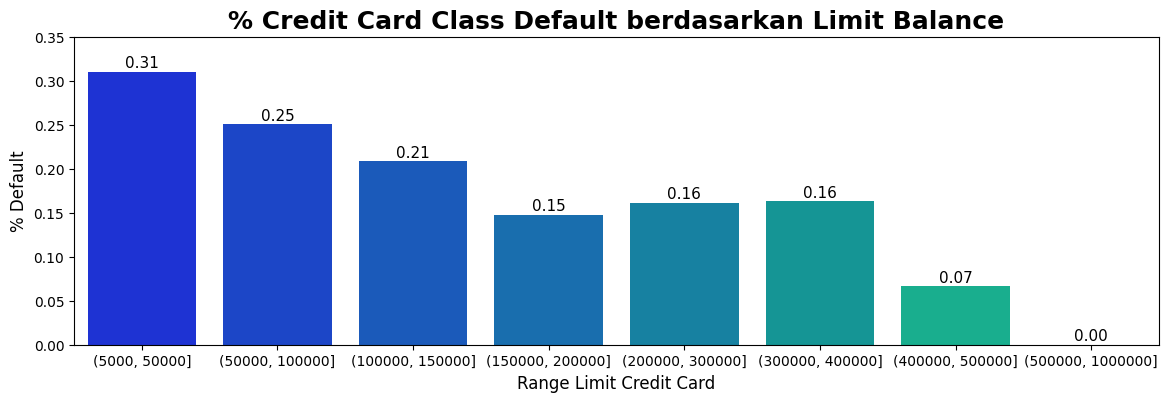

In [14]:
#Visualisasi % Default dari setiap kelas Balance Limit

plt.figure(figsize=(14,4))

ax = sns.barplot(x = 'limit_bin', y = 'default_payment_next_month', data = df_eda, palette = 'winter', order = LimitBin_order, errorbar= None)

plt.xlabel("Range Limit Credit Card", fontsize= 12)
plt.ylabel("% Default", fontsize= 12)
plt.title('% Credit Card Class Default berdasarkan Limit Balance', fontsize=18, fontweight='bold')
plt.ylim(0,0.35)
for p in ax.patches:
    ax.annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.01), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :

- *Customer* banyak memiliki *limit balance credit card* pada range **5.000-50.000** (771 *customer*), sedangkan yang sedikit ada pada limit **500.000-1.000.000** (14 *customer*)
- *Customer* yang banyak memiliki *class default* adalah yang memiliki range *limit balance credit card*  pada **5.000-50.000**
- Dari visualisasi bisa dilihat bahwa semakin tinggi *limit balance credit card* maka jumlah *customer* dengan *class default* semakin sedikit. **Sehingga bisa disimpulkan bahwa *limit balance credit card* berpengaruh terhadap klasifikasi *credit card***

In [15]:
#Pengelompokan umur berdasarkan bins
df_eda['AgeBin'] = pd.cut(df_eda['age'],[20, 25, 30, 35, 40, 50, 60, 80])
print(df_eda['AgeBin'].value_counts())

(25, 30]    742
(30, 35]    571
(40, 50]    567
(35, 40]    479
(20, 25]    390
(50, 60]    187
(60, 80]     29
Name: AgeBin, dtype: int64


In [16]:
# % Umur yang dengan class default
df_eda['default_payment_next_month'].groupby(df_eda['AgeBin']).value_counts(normalize = True)

AgeBin    default_payment_next_month
(20, 25]  0                             0.746154
          1                             0.253846
(25, 30]  0                             0.811321
          1                             0.188679
(30, 35]  0                             0.796848
          1                             0.203152
(35, 40]  0                             0.797495
          1                             0.202505
(40, 50]  0                             0.760141
          1                             0.239859
(50, 60]  0                             0.780749
          1                             0.219251
(60, 80]  0                             0.793103
          1                             0.206897
Name: default_payment_next_month, dtype: float64

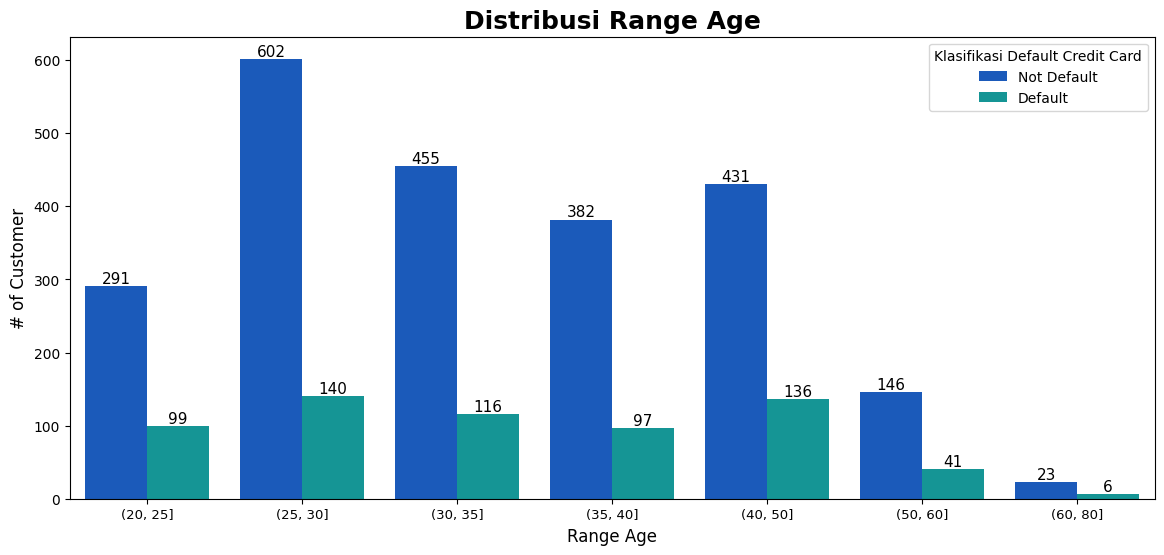

In [17]:
# Membuat Visualisasi distribusi age berdasarkan klasifikasi credit card
plt.figure(figsize=(14,6))

df_eda['AgeBin'] = df_eda['AgeBin'].astype('str')
AgeBin_order = ['(20, 25]', '(25, 30]', '(30, 35]', '(35, 40]', '(40, 50]', '(50, 60]', '(60, 80]']

ax = sns.countplot(data = df_eda, x = 'AgeBin', hue="default_payment_next_month", palette = 'winter', order = AgeBin_order)

plt.title('Distribusi Range Age', fontsize=18, fontweight='bold')
plt.xlabel("Range Age", fontsize= 12)
plt.ylabel("# of Customer", fontsize= 12)
ax.tick_params(axis="x", labelsize= 9.5)
plt.legend(fontsize=10,title='Klasifikasi Default Credit Card', loc='upper right', labels=['Not Default', 'Default'])
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+10), ha='center', va='center',fontsize = 11) 

plt.show()

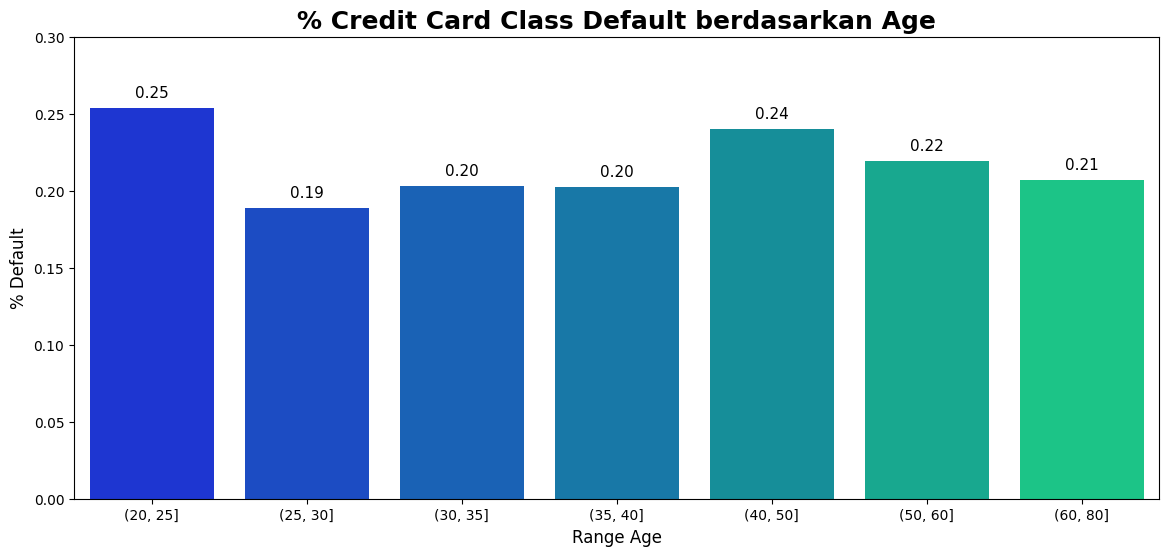

In [18]:
#Visualisasi % Credit Class Default dari setiap kelas

plt.figure(figsize=(14,6))

ax = sns.barplot(x = 'AgeBin', y = 'default_payment_next_month', data = df_eda, palette = 'winter', order = AgeBin_order, errorbar=None)

plt.xlabel("Range Age", fontsize= 12)
plt.ylabel("% Default", fontsize= 12)
plt.title('% Credit Card Class Default berdasarkan Age', fontsize=18, fontweight='bold')
plt.ylim(0,0.30)
for p in ax.patches:
    ax.annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.01), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :

- *Customer* rata-rata memiliki range umur **25-30 tahun** (742 *customer*), sedangkan yang sedikit ada pada range umur **60-80 tahun** (29 *customer*)
- *Customer* yang banyak memiliki *class default* adalah yang memiliki range umur **25-30 tahun**
- Dari visualisasi bisa dilihat, bahwa meskipun range umur tinggi, jumlah % *class default* **tidak berbeda setiap kelasnya**. **Kemungkinan** umur tidak begitu mempengaruhi klasifikasi *credit card* (**korelasi lemah**)

In [19]:
#Copy DF untuk pembuatan bins pay amount
df_eda['PAY_AMT1_bin'] = df_eda['pay_amt_1'].copy()
df_eda['PAY_AMT2_bin'] = df_eda['pay_amt_2'].copy()
df_eda['PAY_AMT3_bin'] = df_eda['pay_amt_3'].copy()
df_eda['PAY_AMT4_bin'] = df_eda['pay_amt_4'].copy()
df_eda['PAY_AMT5_bin'] = df_eda['pay_amt_5'].copy()
df_eda['PAY_AMT6_bin'] = df_eda['pay_amt_6'].copy()

In [20]:
#Membuat bins untuk pay amount
pay_amtx_bins = ['PAY_AMT1_bin', 'PAY_AMT2_bin', 'PAY_AMT3_bin', 'PAY_AMT4_bin', 'PAY_AMT5_bin', 'PAY_AMT6_bin']
for i, col in enumerate (pay_amtx_bins):
    df_eda[col] = pd.cut(df_eda[pay_amtx_bins[i]],[-1, 0, 25000, 50000, 100000, 2000000])

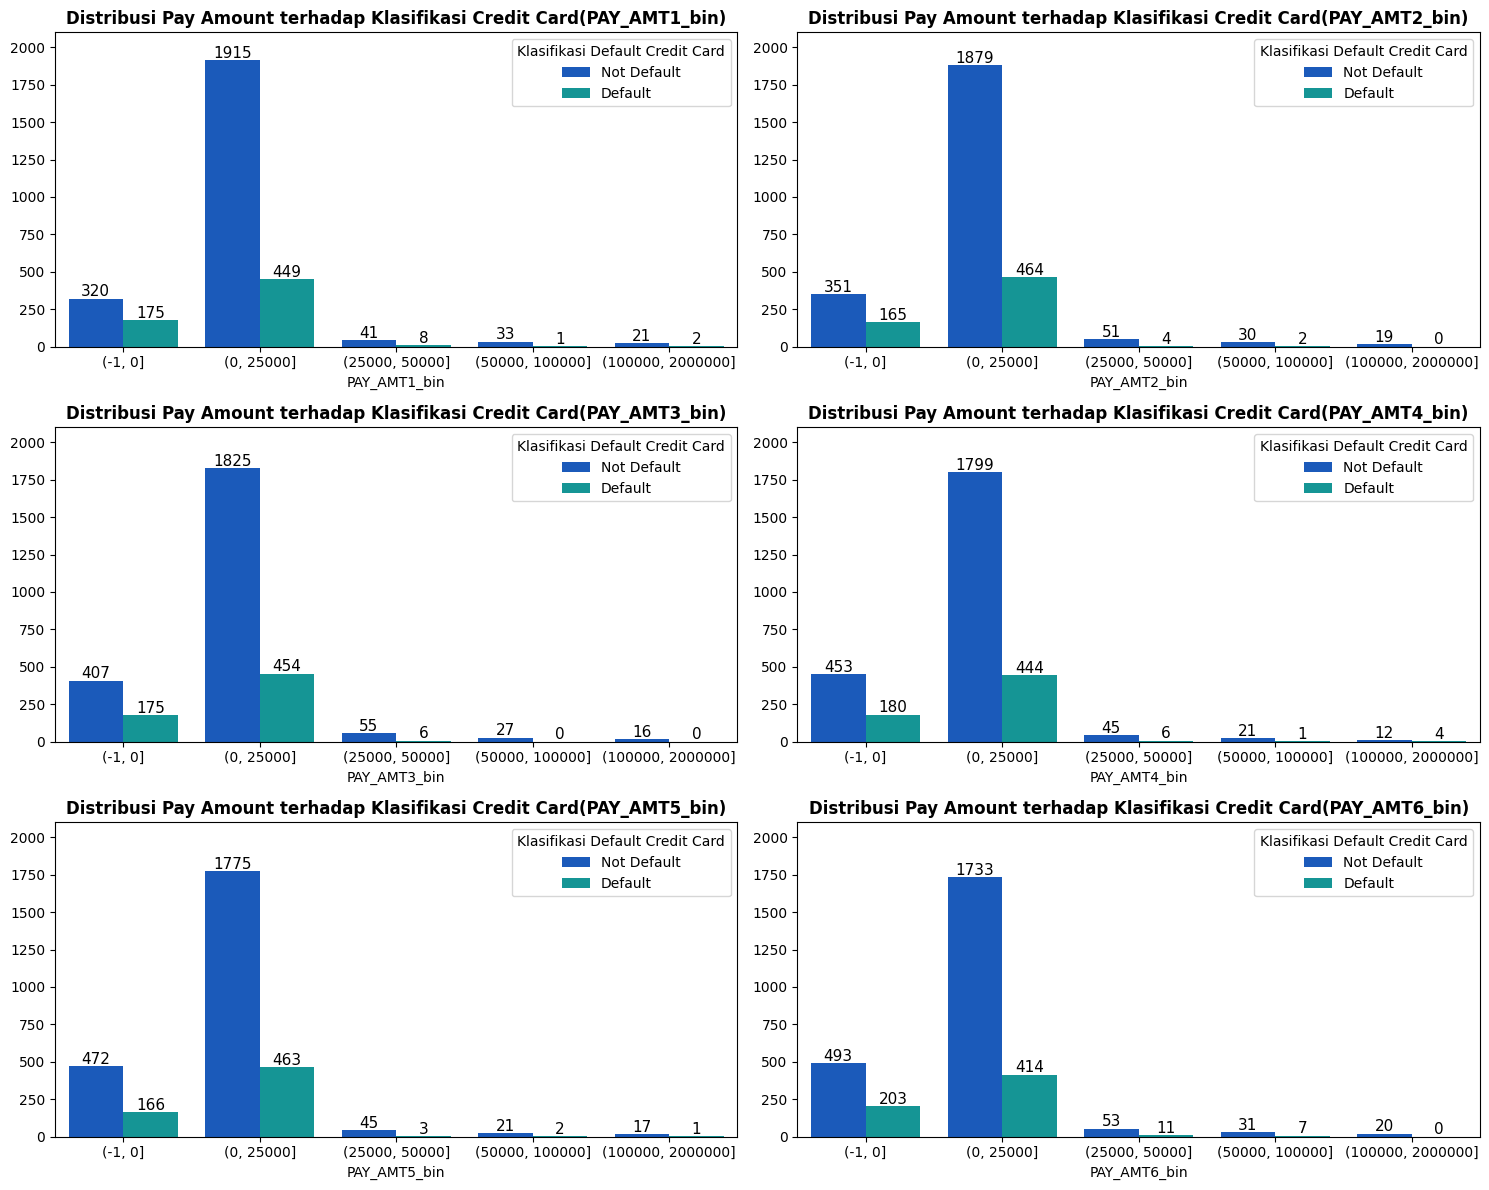

In [21]:
#Pembuatan Visualisasi Distribusi pay amount setiap bulan
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df_eda, x = col, hue="default_payment_next_month", palette = 'winter')
    plt.ylabel('')
    plt.tight_layout()
    plt.legend(fontsize=10,title='Klasifikasi Default Credit Card', loc='upper right', labels=['Not Default', 'Default'])
    a = 'Distribusi Pay Amount terhadap Klasifikasi Credit Card'+ '(' + col +')'
    plt.title(a, fontsize=12, fontweight='bold')
    plt.ylim(0,2100)
    for p in ax.patches:
        ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11)  

plt.show()

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :

- *Pay amount Customer* terbanyak adalah pada range **0-25.000**, sedangkan yang sedikit ada pada range **1.000.000-2.000.000**
- *Customer* yang banyak memiliki *class default* adalah yang memiliki range **0-25.000**
- Trend *pay amount* dari April - September 2005 **mirip** yang artinya ***customer* cenderung membayar dengan jumlah yang sama setiap bulannya**

In [22]:
#Copy dataset untuk pembuatan bins
df_eda['BILL_AMT1_bin'] = df_eda['bill_amt_1'].copy()
df_eda['BILL_AMT2_bin'] = df_eda['bill_amt_2'].copy()
df_eda['BILL_AMT3_bin'] = df_eda['bill_amt_3'].copy()
df_eda['BILL_AMT4_bin'] = df_eda['bill_amt_4'].copy()
df_eda['BILL_AMT5_bin'] = df_eda['bill_amt_5'].copy()
df_eda['BILL_AMT6_bin'] = df_eda['bill_amt_6'].copy()

In [23]:
#Membuat bins untuk bill amount
bill_amtx_bins = ['BILL_AMT1_bin', 'BILL_AMT2_bin', 'BILL_AMT3_bin', 'BILL_AMT4_bin', 'BILL_AMT5_bin', 'BILL_AMT6_bin']

for i, col in enumerate (bill_amtx_bins):
    df_eda[col] = pd.cut(df_eda[bill_amtx_bins[i]],[-350000,-1,0,25000, 75000, 200000, 2000000])

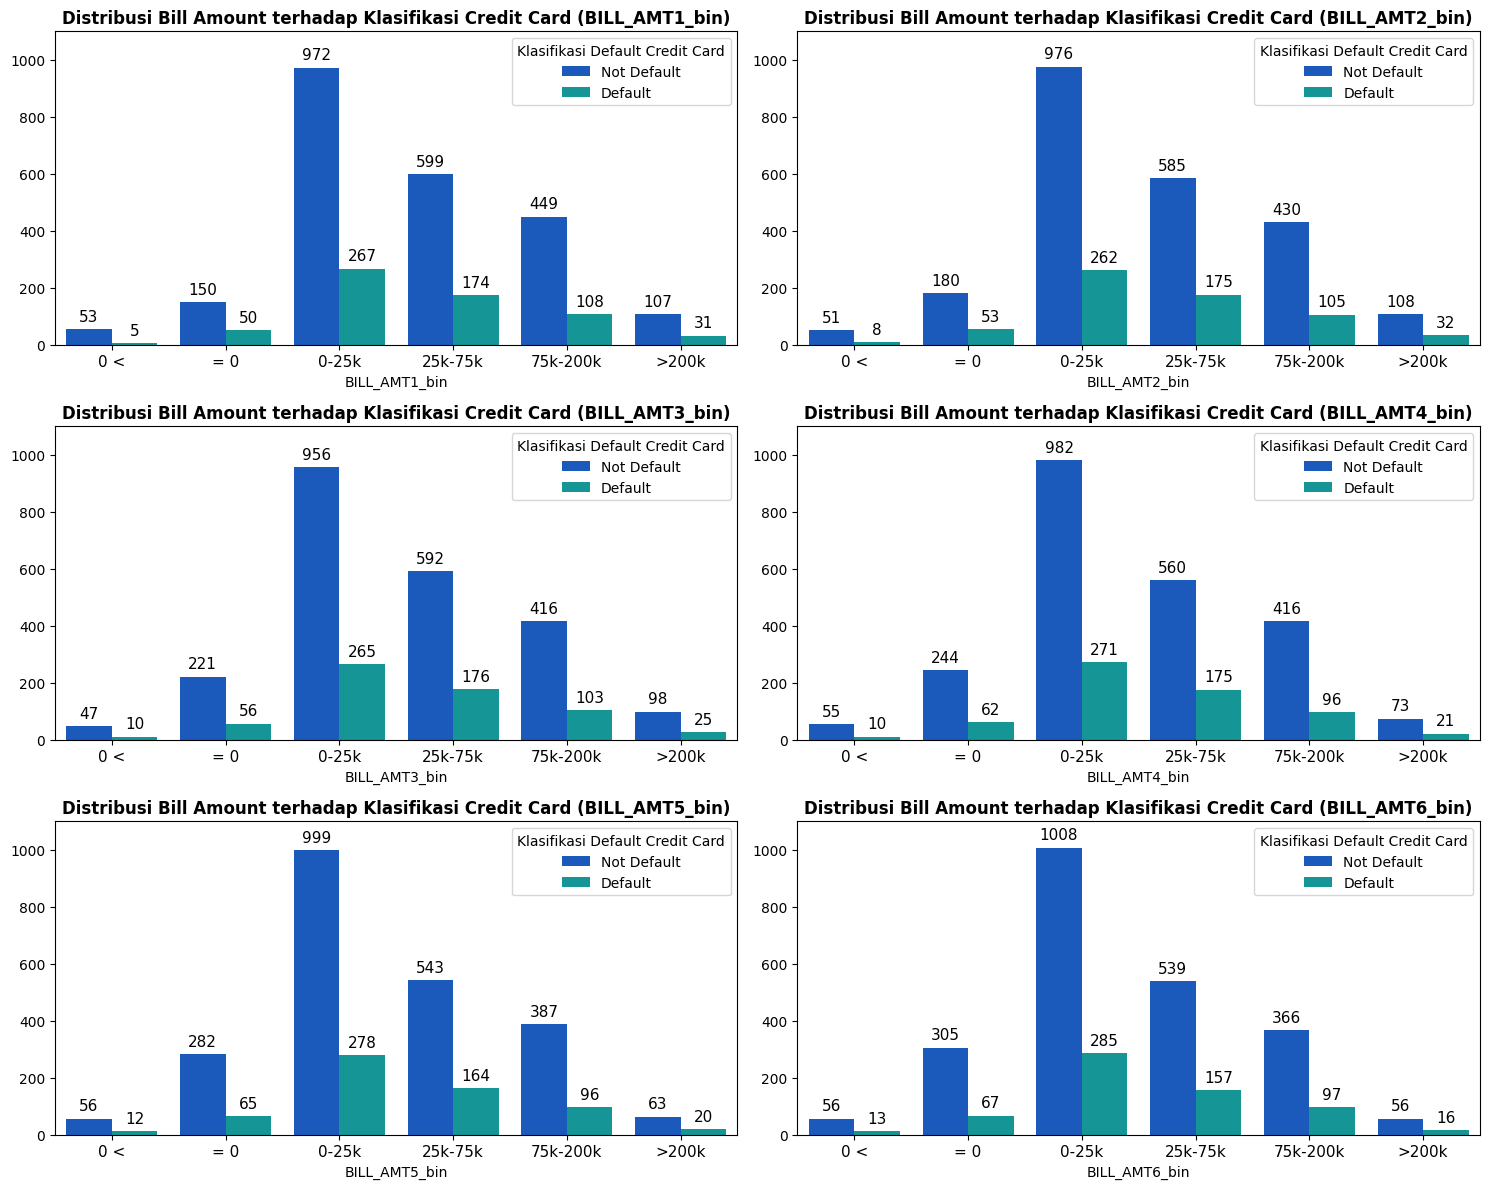

In [24]:
#Visualisasi distribusi bill amount berdasarkan klasifikasi credit card

plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = df_eda, x = col, hue="default_payment_next_month", palette = 'winter')
    plt.ylabel('')
    plt.xticks([0,1,2,3,4,5],['0 <', '= 0', '0-25k', '25k-75k', '75k-200k', '>200k'], fontsize = 11)
    plt.tight_layout()
    plt.ylim(0,1100)
    a = 'Distribusi Bill Amount terhadap Klasifikasi Credit Card '+ '(' + col +')'
    plt.title(a, fontsize=12, fontweight='bold')
    plt.legend(fontsize=10,title='Klasifikasi Default Credit Card', loc='upper right', labels=['Not Default', 'Default'])
    for p in ax.patches:
        ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+45), ha='center', va='center',fontsize = 11)      
        
plt.show()

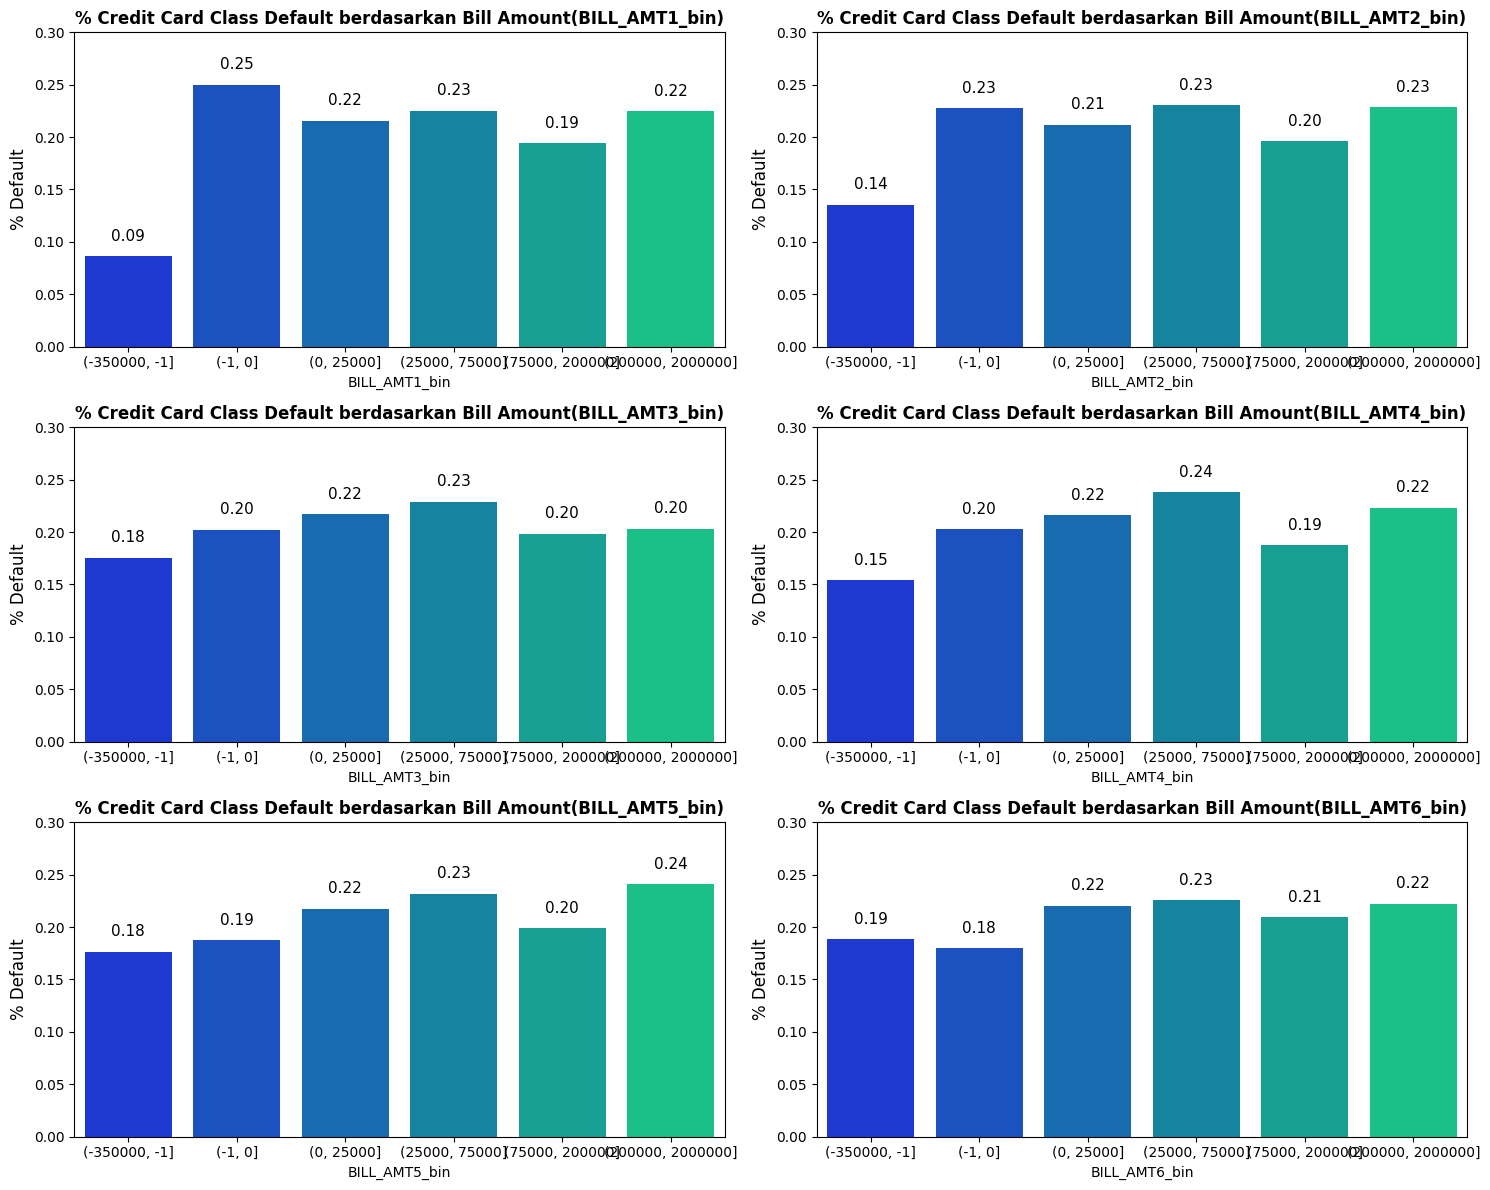

In [25]:
#Visualisasi % Class Default dari setiap kelas bill amount
plt.figure(figsize=(15,12))

for i,col in enumerate(bill_amtx_bins):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default_payment_next_month", data = df_eda, palette = 'winter', errorbar = None)
    plt.ylabel("% Default", fontsize= 12)
    plt.ylim(0,0.3)
    plt.tight_layout()
    a = '% Credit Card Class Default berdasarkan Bill Amount'+ '(' + col +')'
    plt.title(a, fontsize=12, fontweight='bold')
    for p in ax.patches:
        ax.annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.019), ha='center', va='center',fontsize = 11)  
    

plt.show()

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :

- *Customer* rata-rata memiliki tagihan bill pada **0-25K**, sedangkan yang sedikit ada pada range **>200k**
- *Customer* yang banyak memiliki *class default* adalah yang memiliki tagihan bill pada **0-25K**
- Trend klasifikasi setiap kelasnya **mirip** di setiap bulan (dari April - September 2005)
- Yang memiliki bill negatif (bayar sebelum jatuh tempo) memiliki persentase **paling kecil** untuk diklasifikasikan sebagai *class default*
- Secara *overall* jika dilihat dari visualisasi, kemungkinan jumlah bill yang ditagihkan **berkorelasi lemah** dengan *class credit card*. Karena persentase kelas default setiap bulannya mirip

<AxesSubplot: >

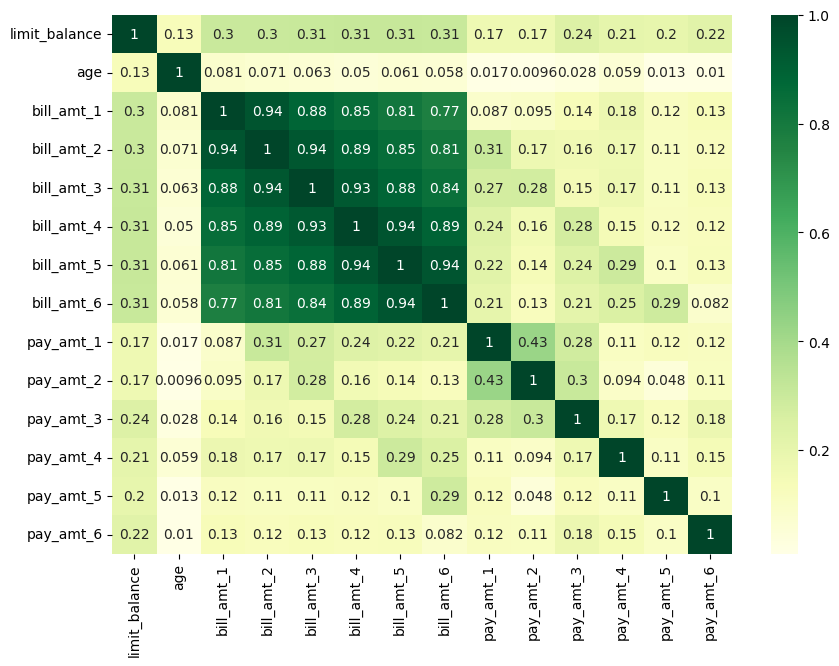

In [26]:
# Pembuatan heatmap untuk menunjukkan korelasi antar feature
plt.rcParams['figure.figsize'] = [10,7]
sns.heatmap(df_eda[df_num_columns].corr(), annot = True, color = 'blue', cmap = 'YlGn')

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :

- `bill_amt` setiap bulannya **berkorelasi positif sangat kuat**. Hal ini sudah pasti, karena jika ada keterlambatan bayar *billing* pada bulan ini maka akan diakumulasikan ke bulan berikutnya. Hal ini berlaku juga sebaliknya, jika membayar untuk 2-3 bulan, pasti *billing* pada bulan berikutnya akan berkurang.
- `limit_balance` memiliki **korelasi lemah positif** terhadap *payment* dan *billing*, karena tidak mungkin jika total *billing* melebihi `limit_balance`. Selain itu *payment* juga dipengaruhi oleh jumlah tagihan/*billing*. Sehingga 3 *feature* tersebut berkorelasi positif, meskipun lemah
- `age` memiliki **korelasi positif lemah terhadap semua *feature***

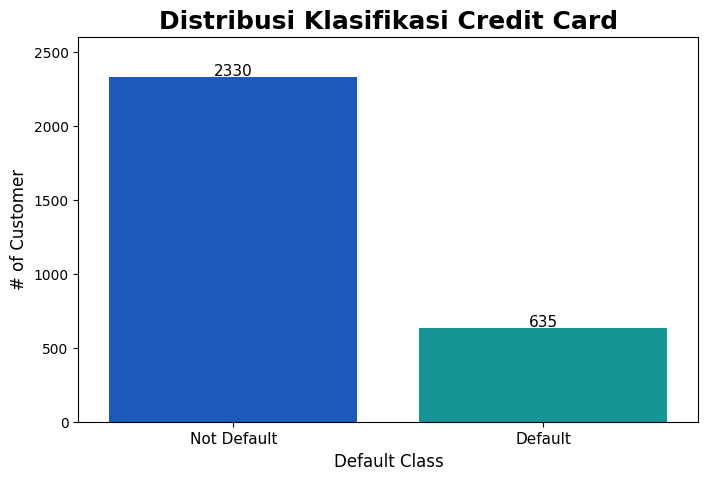

In [27]:
#Visualisasi count klasifikasi credit card
plt.figure(figsize=(8,5))

ax = sns.countplot(x='default_payment_next_month', data=df_eda, palette="winter")

plt.xlabel("Default Class", fontsize= 12)
plt.ylabel("# of Customer", fontsize= 12)
plt.xticks([0,1], ['Not Default', 'Default'], fontsize = 11)
plt.title('Distribusi Klasifikasi Credit Card', fontsize=18, fontweight='bold')
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+40), ha='center', va='center',fontsize = 11) 
plt.ylim(0,2600)
    
plt.show()

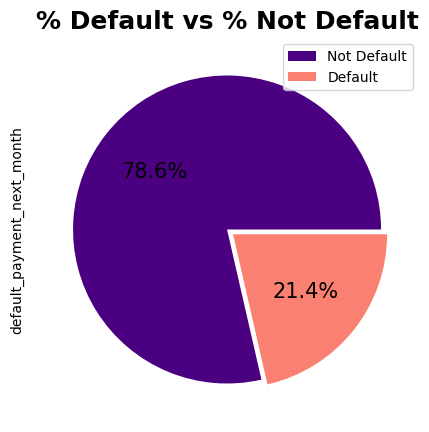

In [28]:
#Pembuatan Pie Chart proprosi antar kelas
plt.figure(figsize=(7,5))

df_eda['default_payment_next_month'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['indigo','salmon'], explode = [0,0.05], textprops = {"fontsize":15})
plt.title('% Default vs % Not Default', fontsize=18, fontweight='bold')
plt.legend(labels=['Not Default', 'Default'])
plt.show()

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :
- *Customer* yang memiliki *class default* **lebih sedikit** dari pada *customer* yang memiliki kelas *not default* (**Data Imbalanced**)

In [29]:
#Menghitung distribusi gender
df_eda['sex'].value_counts()

2    1802
1    1163
Name: sex, dtype: int64

In [30]:
#Distribusi gender berdasarkan klasifikasi credit card
df_eda['default_payment_next_month'].groupby(df_eda['sex']).value_counts(normalize = True)

sex  default_payment_next_month
1    0                             0.774721
     1                             0.225279
2    0                             0.793008
     1                             0.206992
Name: default_payment_next_month, dtype: float64

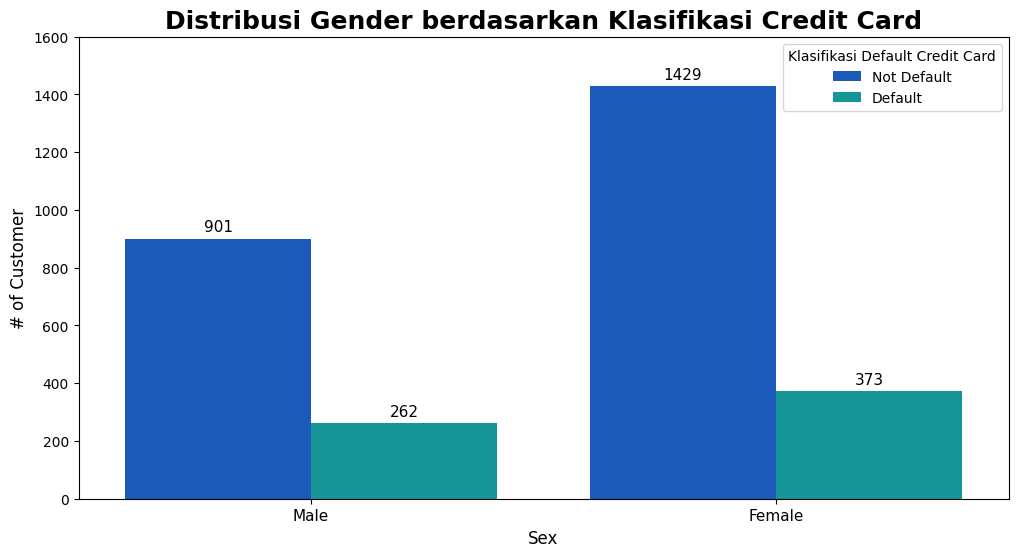

In [31]:
#Visualisasi distribusi gender berdasarkan klasifikasi credit card
plt.figure(figsize=(12,6))

ax = sns.countplot(data = df_eda, x = 'sex', hue="default_payment_next_month", palette = 'winter')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("# of Customer", fontsize= 12)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)
plt.ylim(0,1500)
plt.title('Distribusi Gender berdasarkan Klasifikasi Credit Card', fontsize=18, fontweight='bold')
plt.legend(fontsize=10,title='Klasifikasi Default Credit Card', loc='upper right', labels=['Not Default', 'Default'])
plt.ylim(0,1600)
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+40), ha='center', va='center',fontsize = 11) 

plt.show()

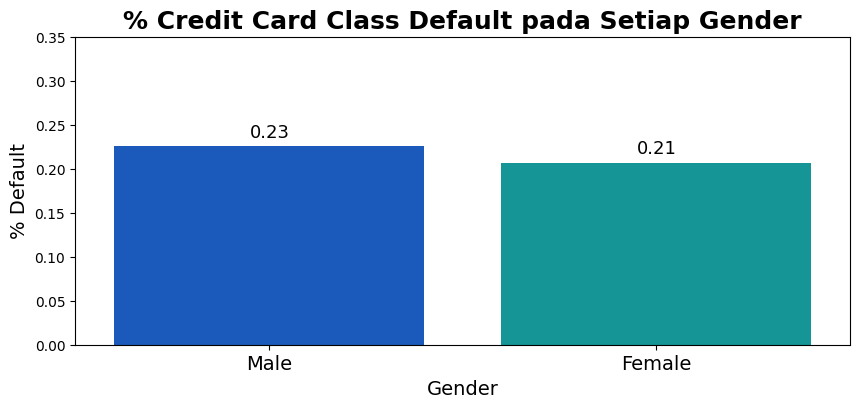

In [32]:
#Visualisasi persentase klasifikasi credit card berdasarkan gender
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "sex", y = "default_payment_next_month", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Default", fontsize= 14)
plt.xlabel("Gender", fontsize= 14)
plt.ylim(0,0.35)
plt.xticks([0,1],['Male', 'Female'], fontsize = 14)
plt.title('% Credit Card Class Default pada Setiap Gender', fontsize=18, fontweight='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.35, p.get_height()+0.01),fontsize=13)

plt.show()

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :

- *Customer* **wanita** jumlahnya lebih **banyak** dari pada *customer* pria, akan tetapi **persentase** *customer* pria diklasifikasikan sebagai *class default* **lebih besar** dari pada *customer* wanita

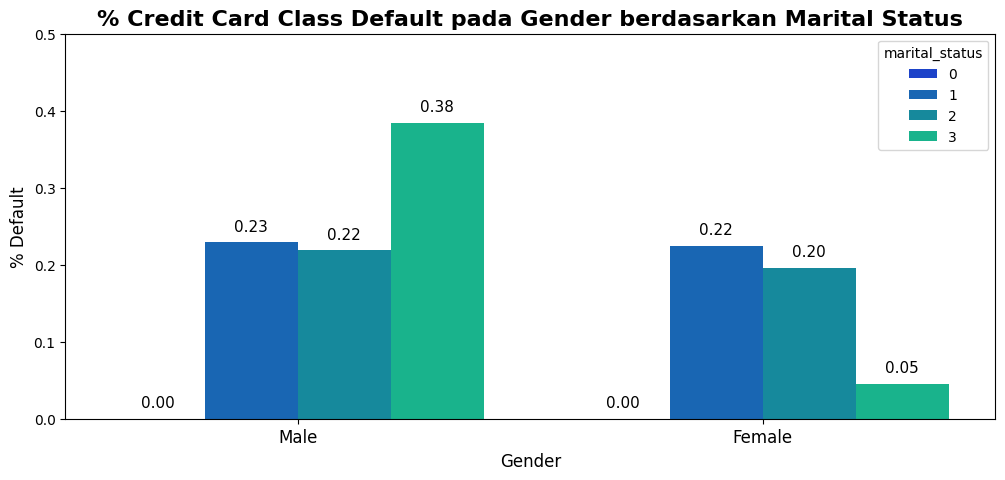

In [33]:
#Visualisasi Gender berdasarkan Marital status yang sama
plt.figure(figsize=(12,5))

ax = sns.barplot(x = "sex", y = "default_payment_next_month", hue = "marital_status", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Default", fontsize= 12)
plt.xlabel("Gender", fontsize= 12)
plt.ylim(0,0.5)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('% Credit Card Class Default pada Gender berdasarkan Marital Status', fontsize=16, fontweight='bold')

for p in ax.patches:
    ax.annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.02), ha='center', va='center',fontsize = 11) 

plt.show()

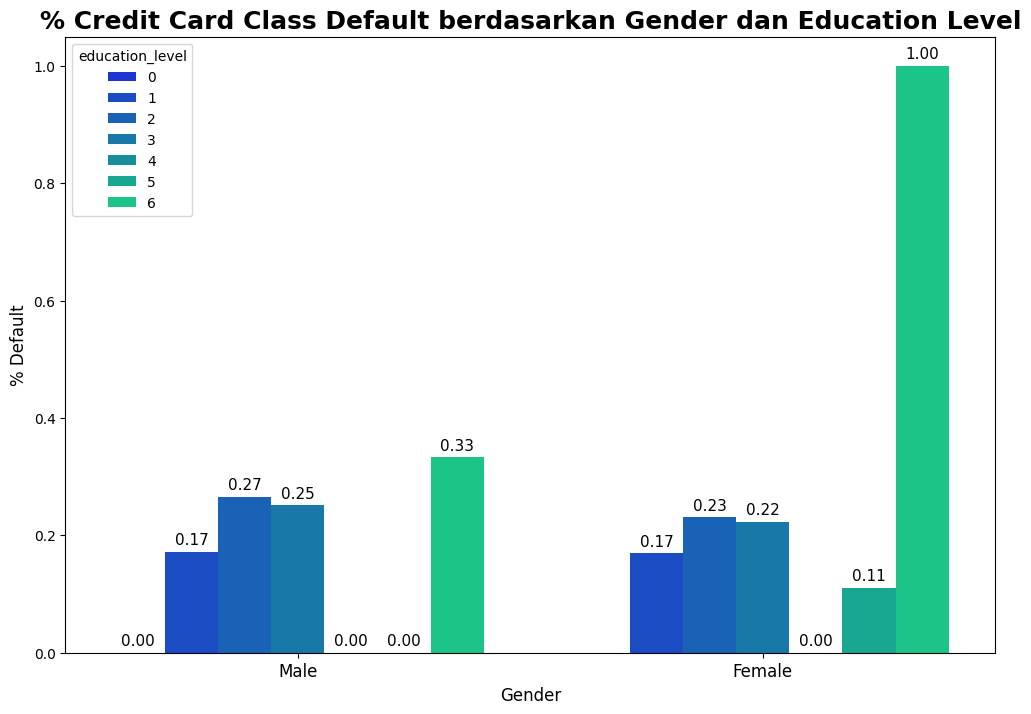

In [34]:
#Visualisasi Gender berdasarkan education yang sama
plt.figure(figsize=(12,8))

ax = sns.barplot(x = "sex", y = "default_payment_next_month", hue = "education_level", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Default", fontsize= 12)
plt.xlabel("Gender", fontsize= 12)
plt.xticks([0,1],['Male', 'Female'], fontsize = 12)
plt.title('% Credit Card Class Default berdasarkan Gender dan Education Level', fontsize=18, fontweight='bold')

for p in ax.patches:
    ax.annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.02), ha='center', va='center',fontsize = 11) 

plt.show()

Dari 2 visualisasi diatas dapat disimpulkan bahwa :

- Gender **pria** memiliki **probabilitas** lebih **besar** untuk diklasifikasikan sebagai ***class default***, karena setelah dibandingkan dengan *marital status* dan *education level* yang sama dengan gender wanita, gender pria mendominasi hampir di seluruh kelas

In [35]:
#Count customer pada setiap education level
df_eda['education_level'].value_counts()

2    1400
1    1039
3     483
5      24
4      13
6       4
0       2
Name: education_level, dtype: int64

In [36]:
#% credit card dengan class default pada setial education level
df_eda['default_payment_next_month'].groupby(df_eda['education_level']).value_counts(normalize = True)

education_level  default_payment_next_month
0                0                             1.000000
1                0                             0.829644
                 1                             0.170356
2                0                             0.755714
                 1                             0.244286
3                0                             0.766046
                 1                             0.233954
4                0                             1.000000
5                0                             0.958333
                 1                             0.041667
6                0                             0.500000
                 1                             0.500000
Name: default_payment_next_month, dtype: float64

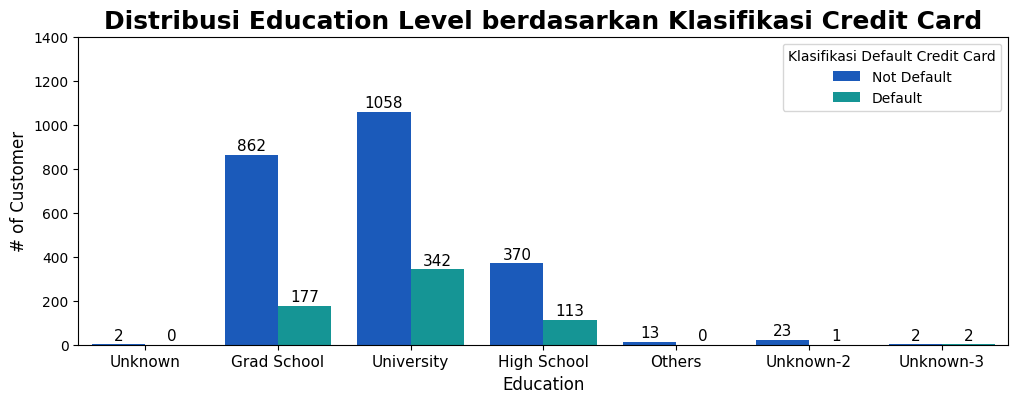

In [37]:
#Visualisasi distribusi education level berdasarkan klasifikasi credit card
plt.figure(figsize=(12,4))

ax = sns.countplot(data = df_eda, x = 'education_level', hue="default_payment_next_month", palette = 'winter')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("# of Customer", fontsize= 12)
plt.xticks([0,1,2,3,4,5,6],['Unknown', 'Grad School', 'University','High School', 'Others','Unknown-2','Unknown-3'], fontsize = 11)
plt.title('Distribusi Education Level berdasarkan Klasifikasi Credit Card', fontsize=18, fontweight='bold')
plt.legend(fontsize=10,title='Klasifikasi Default Credit Card', loc='upper right', labels=['Not Default', 'Default'])
plt.ylim(0,1400)
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+40), ha='center', va='center',fontsize = 11) 

plt.show()

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :

- Terdapat 3 *category* unknown dan 1 *category* others
- *Customer* yang **dominan** adalah *customer* dengan *education level* university. Setelah university yang dominan adalah grad school kemudian disusul dengan high school education
- Jika dilihat dari visualisasi, yang masuk ke ***class default* terbanyak adalah *customer* dengan education level university**

In [38]:
#Count customer pada setiap marital status
df_eda['marital_status'].value_counts()

2    1594
1    1332
3      35
0       4
Name: marital_status, dtype: int64

In [39]:
#% klasifikasi class Default dari setiap marital status
df_eda['default_payment_next_month'].groupby(df_eda['marital_status']).value_counts(normalize = True)

marital_status  default_payment_next_month
0               0                             1.000000
1               0                             0.773273
                1                             0.226727
2               0                             0.794856
                1                             0.205144
3               0                             0.828571
                1                             0.171429
Name: default_payment_next_month, dtype: float64

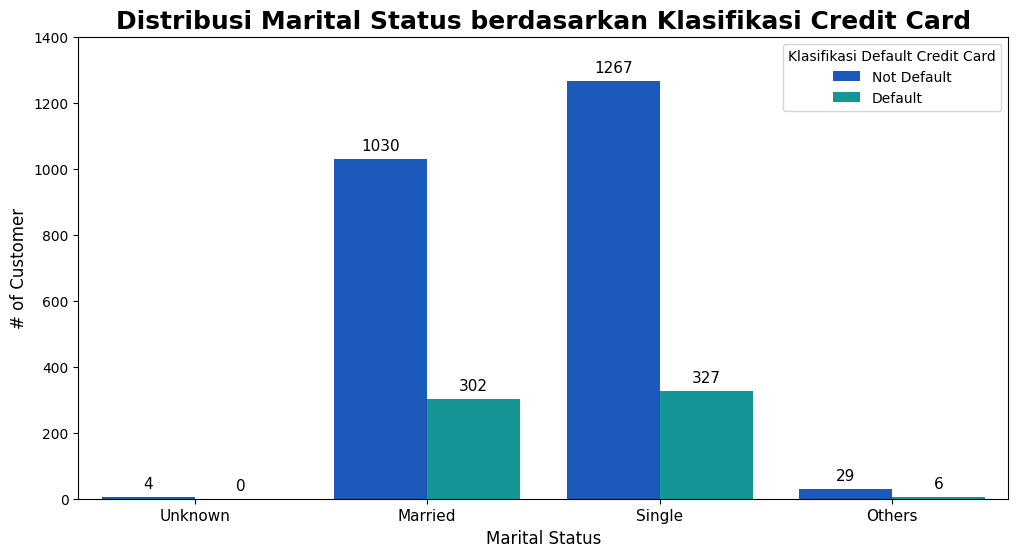

In [40]:
#Visualisasi distribusi marital status berdasarkan klasifikasi credit catd
plt.figure(figsize=(12,6))

ax = sns.countplot(data = df_eda, x = 'marital_status', hue="default_payment_next_month", palette = 'winter')

plt.xlabel("Marital Status", fontsize= 12)
plt.ylabel("# of Customer", fontsize= 12)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single','Others'], fontsize = 11)
plt.title('Distribusi Marital Status berdasarkan Klasifikasi Credit Card', fontsize=18, fontweight='bold')
plt.legend(fontsize=10,title='Klasifikasi Default Credit Card', loc='upper right', labels=['Not Default', 'Default'])
plt.ylim(0,1400)
for p in ax.patches:
    ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+40), ha='center', va='center',fontsize = 11) 

plt.show()

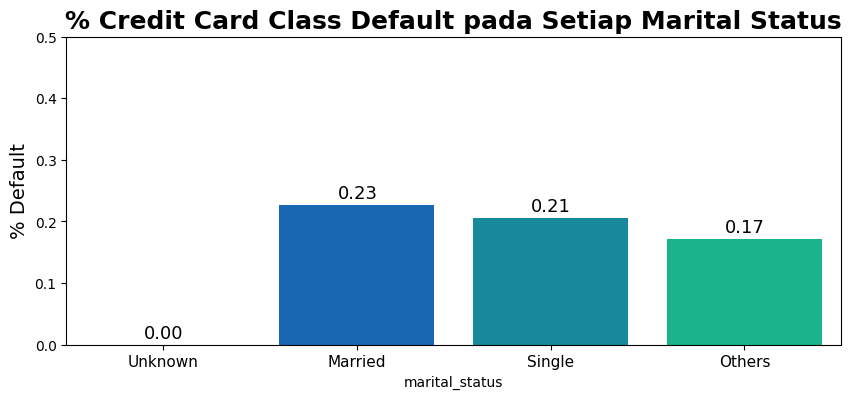

In [41]:
#Visualisasi persentase credit card dengan class default pada setiap marital status
plt.figure(figsize=(10,4))

ax = sns.barplot(x = "marital_status", y = "default_payment_next_month", data = df_eda, palette = 'winter', errorbar= None)

plt.ylabel("% Default", fontsize= 14)
plt.ylim(0,0.5)
plt.xticks([0,1,2,3],['Unknown', 'Married', 'Single','Others'], fontsize = 11)
plt.title('% Credit Card Class Default pada Setiap Marital Status', fontsize=18, fontweight='bold')
for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.3, p.get_height()+0.011),fontsize=13)

plt.show()

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :

- *Customer* **banyak** yang memiliki ***marital status* single** (sekitar 1.500) kemudian disusul dengan marital status married (sekitar 1.300)
- Meskipun jumlah *customer* dengan marital status married lebih sedikit, akan tetapi persentase *customer* tersebut diklasifikasikan sebagai *class default* **lebih besar** dari pada *customer* dengan marital status single

In [42]:
#count customer pada setiap klasifikasi pay
df_eda.loc[:,'pay_1'].value_counts()

 0    1516
-1     540
 1     356
 2     262
-2     247
 3      29
 4       7
 8       3
 5       2
 7       2
 6       1
Name: pay_1, dtype: int64

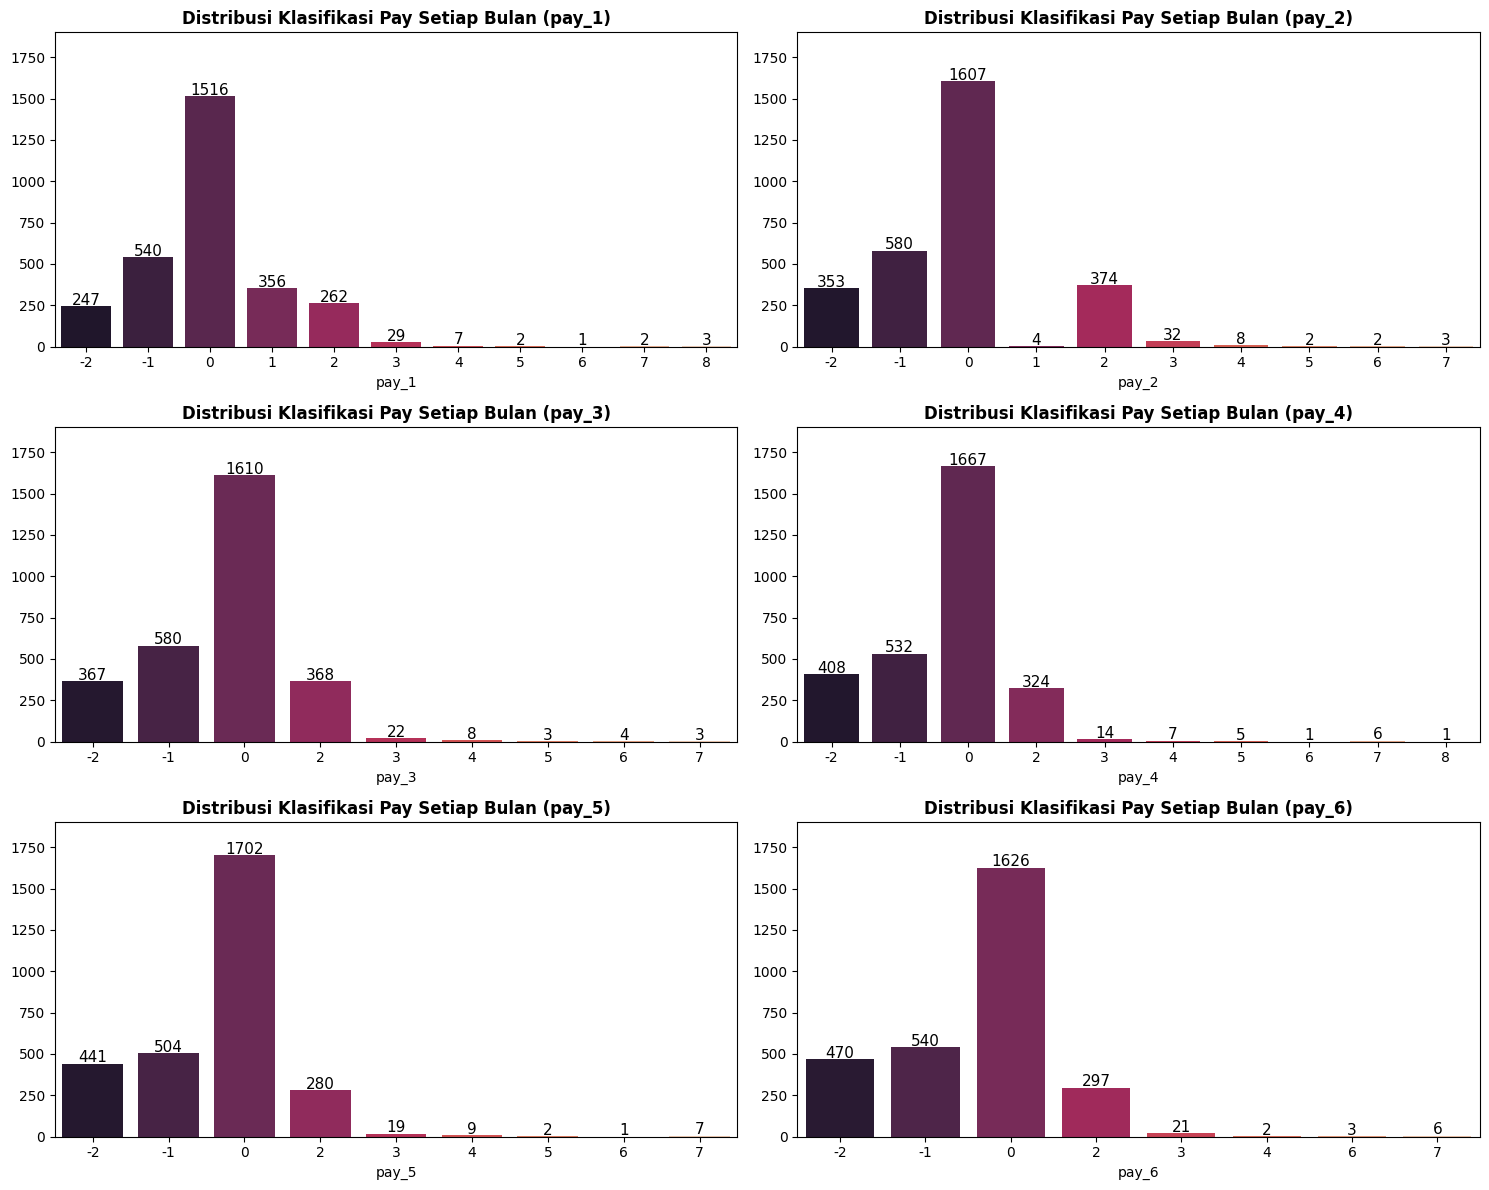

In [43]:
#Distribusi category pay
pay_x_fts = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data=df_eda, x= col ,palette = 'rocket')
    plt.ylabel('')
    plt.tight_layout()
    plt.ylim(0,1900)
    a = 'Distribusi Klasifikasi Pay Setiap Bulan '+ '(' + col +')'
    plt.title(a, fontsize=12, fontweight='bold')
    for p in ax.patches:
        ax.annotate("%.0f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+35), ha='center', va='center',fontsize = 11)
plt.show()

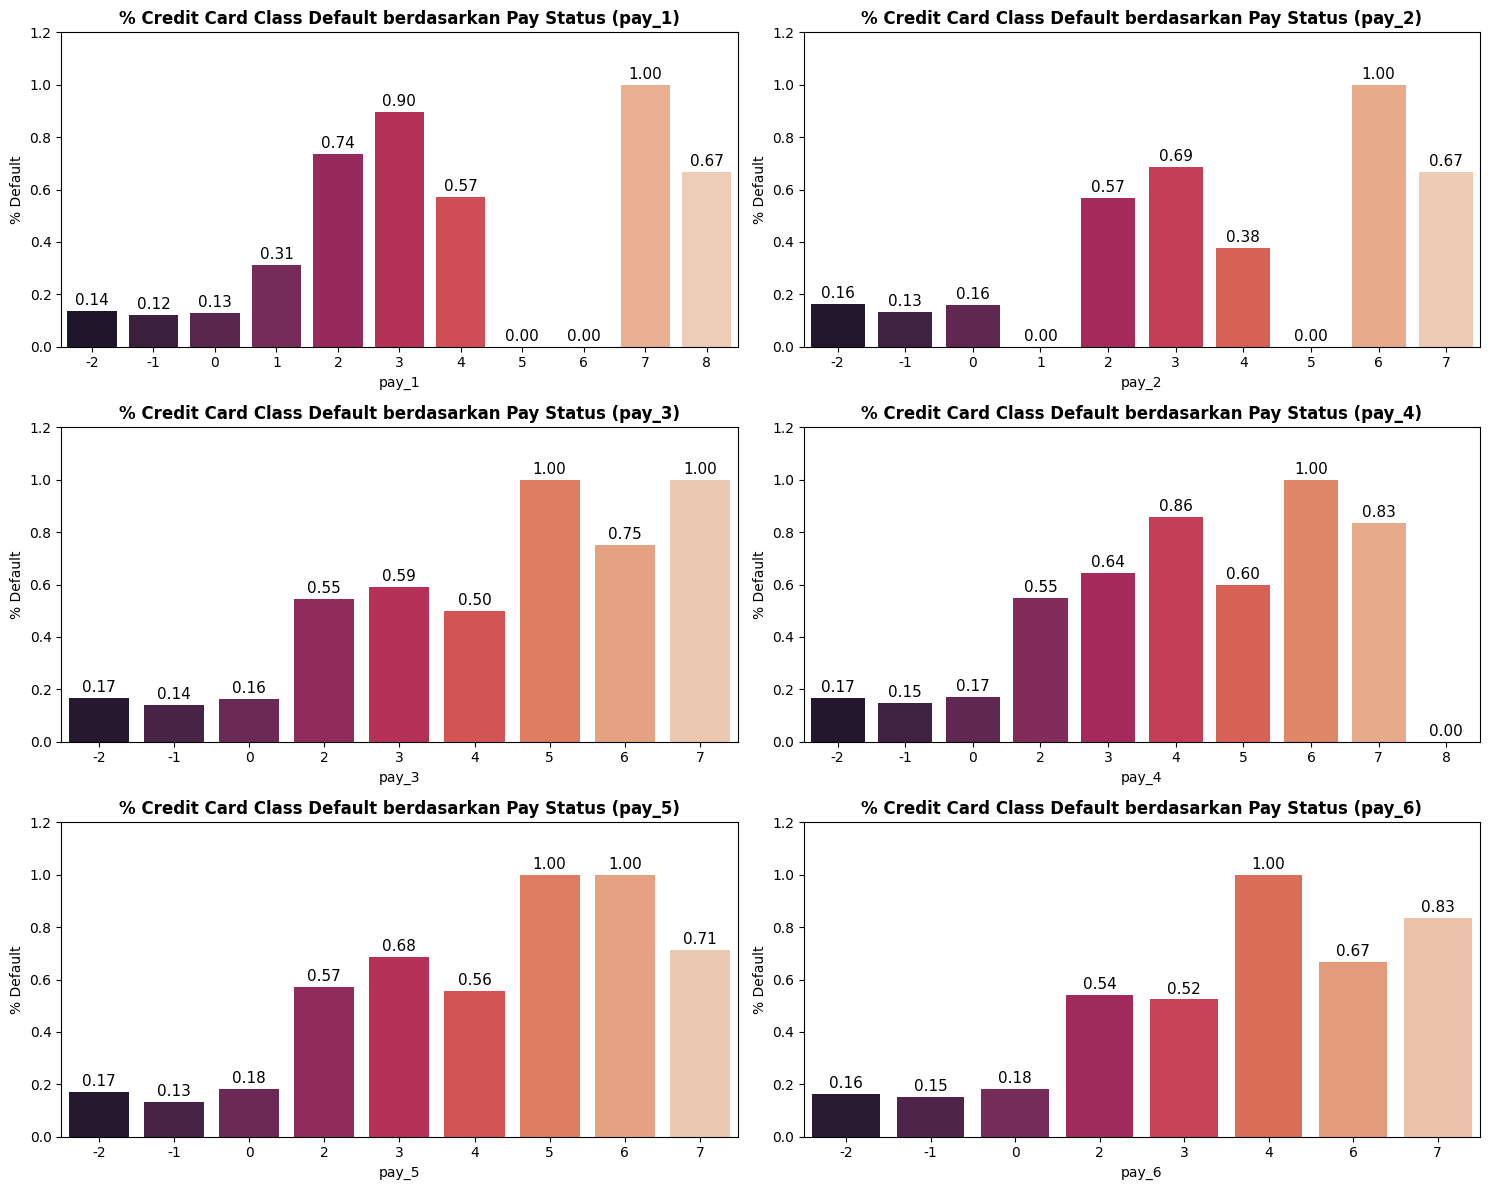

In [44]:
# % klasifikasi class default dari setiap pay status

plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x_fts):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "default_payment_next_month", data = df_eda, palette = 'rocket', errorbar= None)
    plt.ylabel("% Default", fontsize= 10)
    plt.ylim(0,1.2)
    plt.tight_layout()
    a = '% Credit Card Class Default berdasarkan Pay Status '+ '(' + col +')'
    plt.title(a, fontsize=12, fontweight='bold')
    for p in ax.patches:
        ax.annotate("%.2f"%(p.get_height()), (p.get_x() + p.get_width() / 2,
                    p.get_height()+0.04), ha='center', va='center',fontsize = 11)

plt.show()

Dari informasi dan visualisasi di-atas dapat disimpulkan bahwa :

- Klasifikasi di-dominasi oleh *class 0* yang artinya **hampir seluruh *customer*** membayar kredit dengan **tepat waktu**
- Hanya **sedikit** *customer* yang telat **>4 bulan**
- Persentase *customer* diklasifikasikan sebagai *class default* akan semakin meningkat jika telatnya makin lama (**berkorelasi positif**)
- Trend *customer* setiap bulannya untuk diklasifikasikan sebagai *class default* tidak jauh berbeda (***class* pay yang tinggi memiliki probabilitas tinggi untuk diklasifikasikan sebagai *class default***)

In [45]:
#Definisi variabel X dan y
X = df.drop(['default_payment_next_month'], axis=1)
y = df['default_payment_next_month']

In [46]:
#Menampilkan X
X

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
0,130000,1,1,1,45,0,0,0,0,0,0,58180,59134,61156,62377,63832,65099,2886,2908,2129,2354,2366,2291
1,230000,1,2,1,41,0,0,0,0,0,0,301038,305327,213058,216260,215968,174195,9405,7769,7757,8030,6549,5226
2,200000,1,1,1,58,0,0,0,0,0,0,192461,195970,122214,124647,126921,129167,7822,4417,4446,4597,4677,4698
3,500000,1,1,1,39,0,0,0,0,0,0,133598,167378,171106,174500,137406,204975,54209,4607,4603,5224,207440,7509
4,230000,1,1,1,48,0,0,0,0,0,0,160879,161797,165107,105508,108101,110094,7000,6607,3773,4290,4164,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,30000,2,3,2,50,-1,-1,2,-1,-1,-2,178,1860,940,1110,0,0,1860,0,1110,0,0,0
2961,20000,2,1,2,25,-1,-1,-1,-1,-1,-2,2650,0,855,640,0,0,0,855,640,0,0,2742
2962,280000,2,1,2,52,-1,-1,-1,-1,-2,-2,886,0,930,0,0,0,0,930,0,0,0,0
2963,360000,2,2,2,26,-1,-1,-1,-1,-2,-2,1968,459,2500,0,0,0,463,2500,0,0,0,0


In [47]:
#Menampilkan y
y

0       0
1       1
2       0
3       0
4       0
       ..
2960    1
2961    0
2962    0
2963    0
2964    0
Name: default_payment_next_month, Length: 2965, dtype: int64

In [48]:
#Split X train, X test, y train dan y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (2372, 23)
Test Size  :  (593, 23)


In [49]:
#print X_train
X_train

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1597,30000,2,2,2,22,2,0,0,0,0,0,30324,30123,30299,27758,22720,19136,1900,1600,2000,2000,614,924
973,100000,2,2,2,29,0,0,0,0,0,0,75012,77784,73535,72067,59495,56850,4000,3105,4069,3000,2500,2000
218,240000,1,3,2,40,0,0,0,0,0,0,245311,237034,242807,226872,233115,239229,8491,9600,8896,10690,223765,9395
1544,50000,1,2,1,28,2,0,0,0,0,0,42435,44030,43979,31508,16519,19231,3000,2000,2000,2000,3000,1000
1887,360000,1,1,2,38,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,20000,1,1,2,24,2,2,2,2,2,2,1891,5680,5441,6346,6099,7235,4000,0,1000,0,1237,1000
2851,290000,2,1,2,29,-1,-1,-1,-1,-1,-1,6649,15819,10986,8184,14936,19573,15837,11584,8184,14936,19573,6309
926,200000,2,1,2,26,0,0,0,0,0,0,18630,15996,16304,14973,20542,15810,1502,1200,300,7000,8000,4000
221,30000,1,3,2,25,0,0,0,0,0,0,23075,23996,25407,27312,8810,6355,2000,2500,3000,178,1000,0


In [50]:
# Memisahkan numerical, categorical dan target feature

Xtrain_num_columns = ['limit_balance','age','bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','pay_amt_1','pay_amt_2','pay_amt_3','pay_amt_4','pay_amt_5','pay_amt_6']
Xtrain_cat_columns = ['education_level','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6','sex','marital_status']
Ytrain_target_column = ['default_payment_next_month']
print('Num Columns : ', Xtrain_num_columns)
print('Cat Columns : ', Xtrain_cat_columns)
print('Target Columns : ', Ytrain_target_column)

Num Columns :  ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat Columns :  ['education_level', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'sex', 'marital_status']
Target Columns :  ['default_payment_next_month']


In [51]:
#Definisi fungsi untuk membuat boxplot dan histogram dari setiap feature numeric

def diagnostic_plots(df, variable):
    # Mendefinisikan figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram '+ variable )

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot ' + variable)

    plt.show()

    #Cek skew feature
    print('\nSkewness Value ',variable, ' : ' , df[variable].skew())

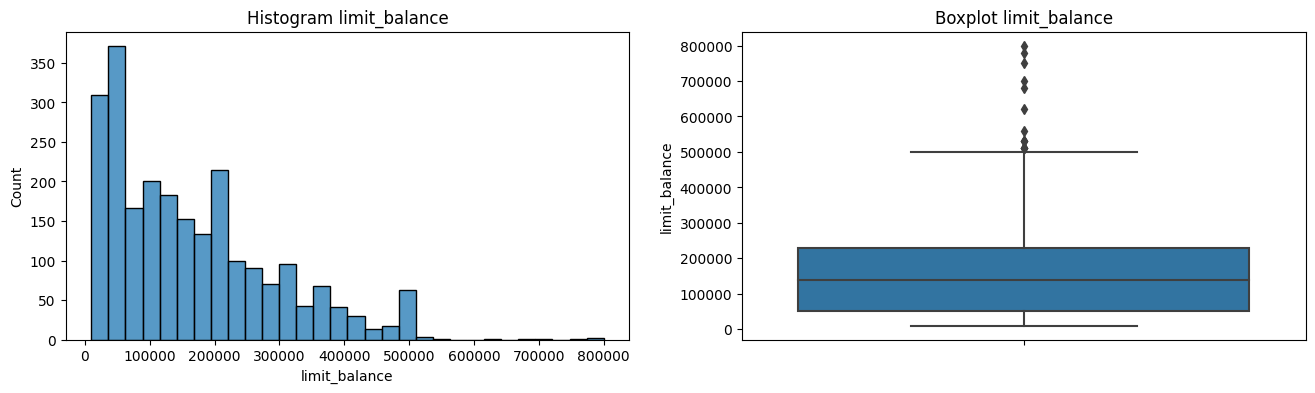


Skewness Value  limit_balance  :  1.0534660767865285


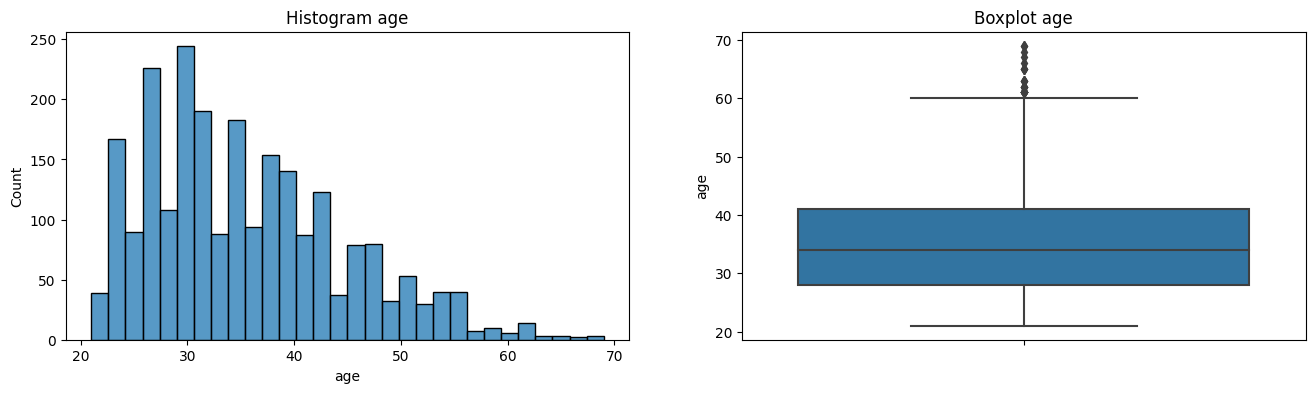


Skewness Value  age  :  0.7450224494168981


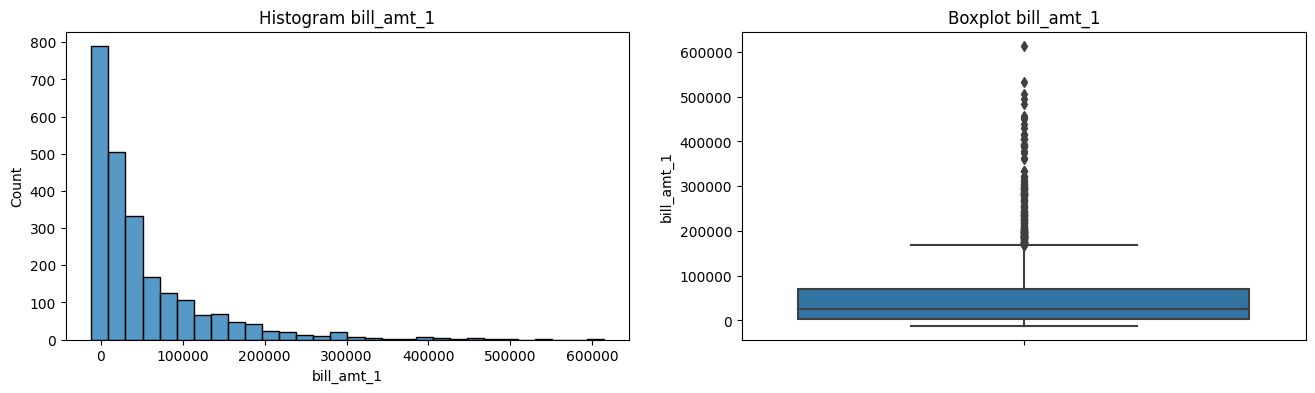


Skewness Value  bill_amt_1  :  2.520352276989637


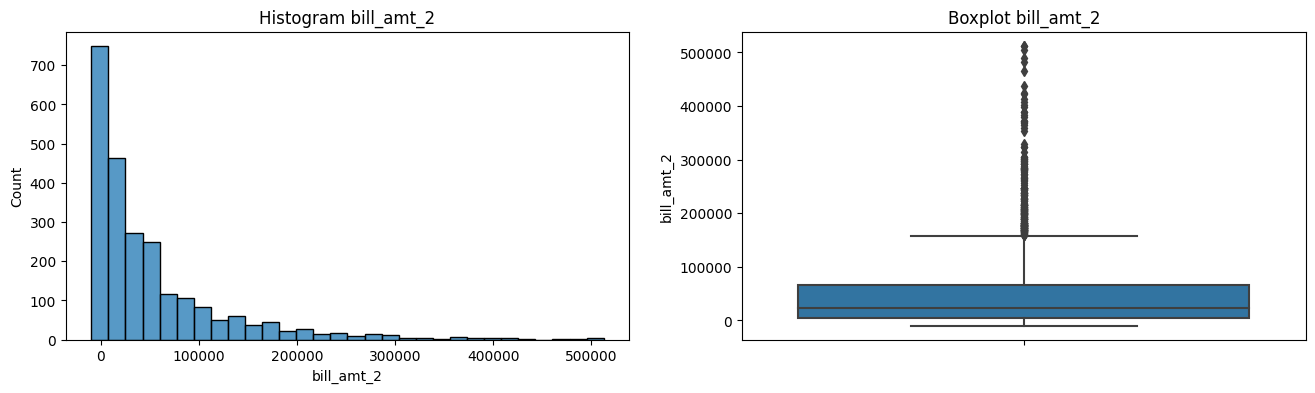


Skewness Value  bill_amt_2  :  2.4921388012279233


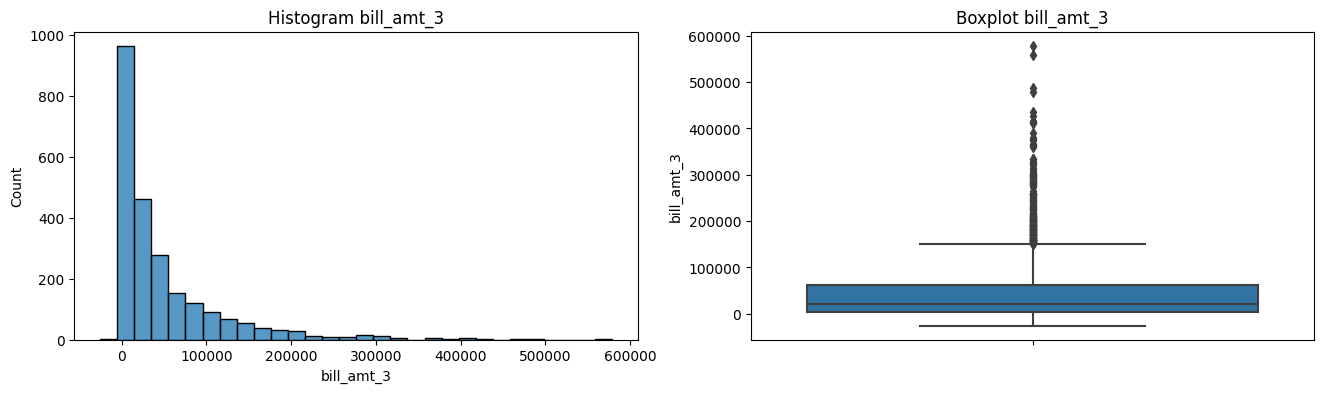


Skewness Value  bill_amt_3  :  2.603929940259877


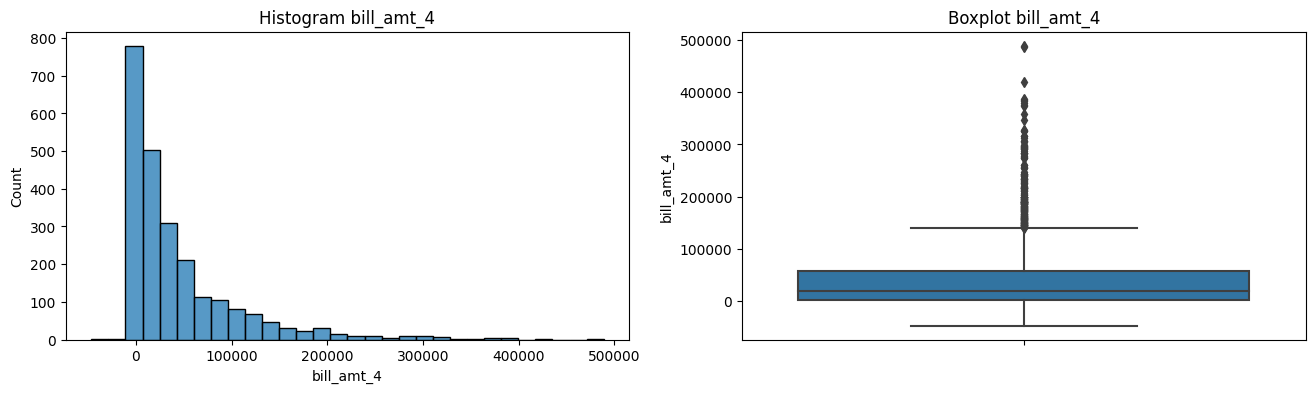


Skewness Value  bill_amt_4  :  2.4669715565346784


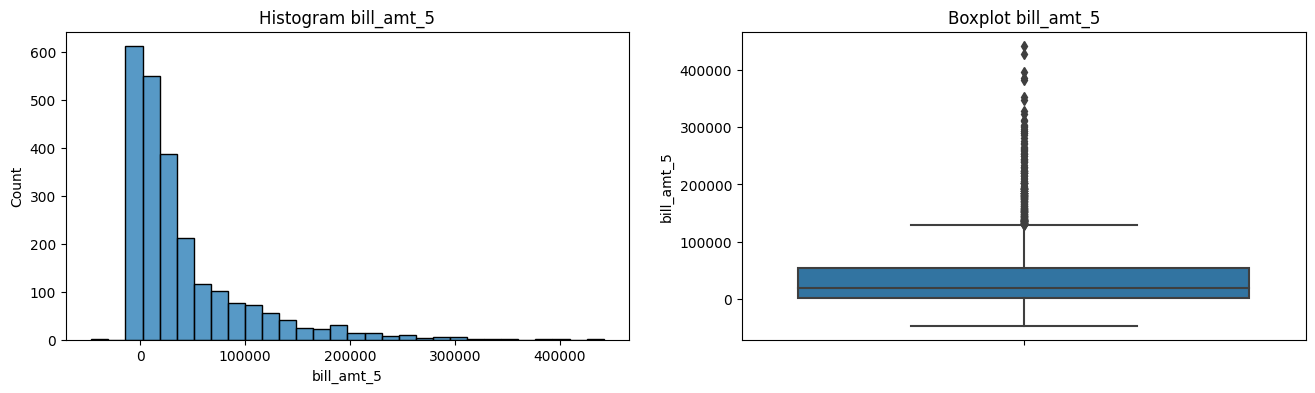


Skewness Value  bill_amt_5  :  2.369712758056831


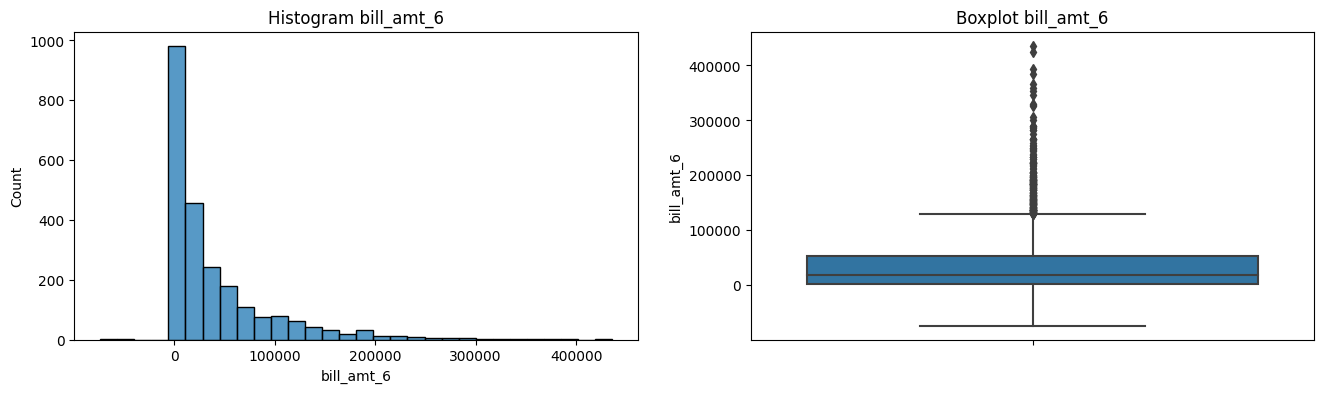


Skewness Value  bill_amt_6  :  2.399770022342925


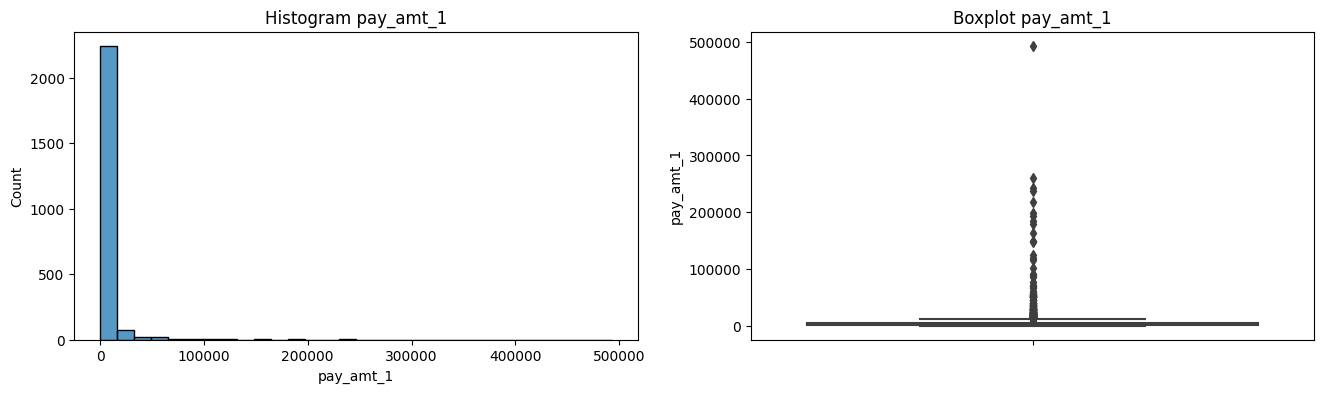


Skewness Value  pay_amt_1  :  12.851803902508003


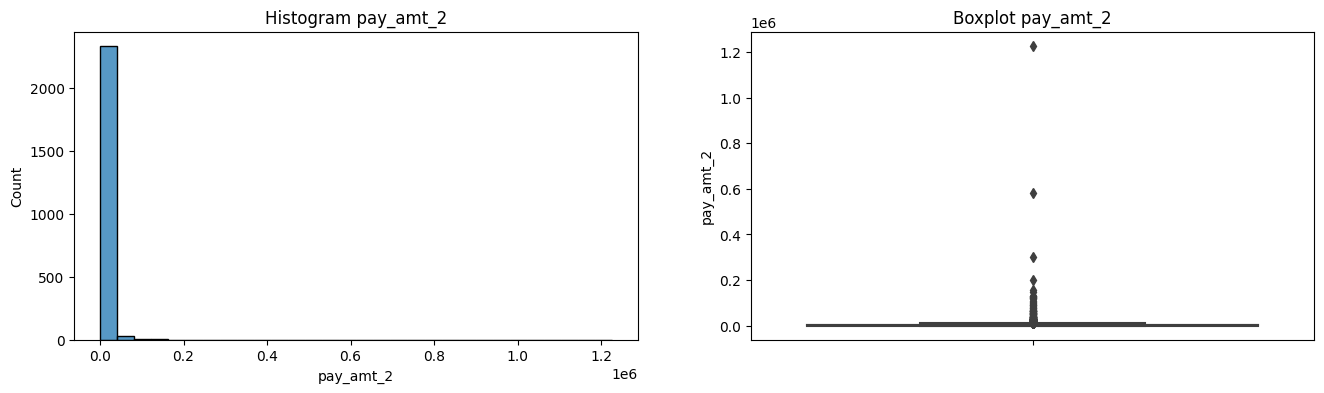


Skewness Value  pay_amt_2  :  28.845156024908515


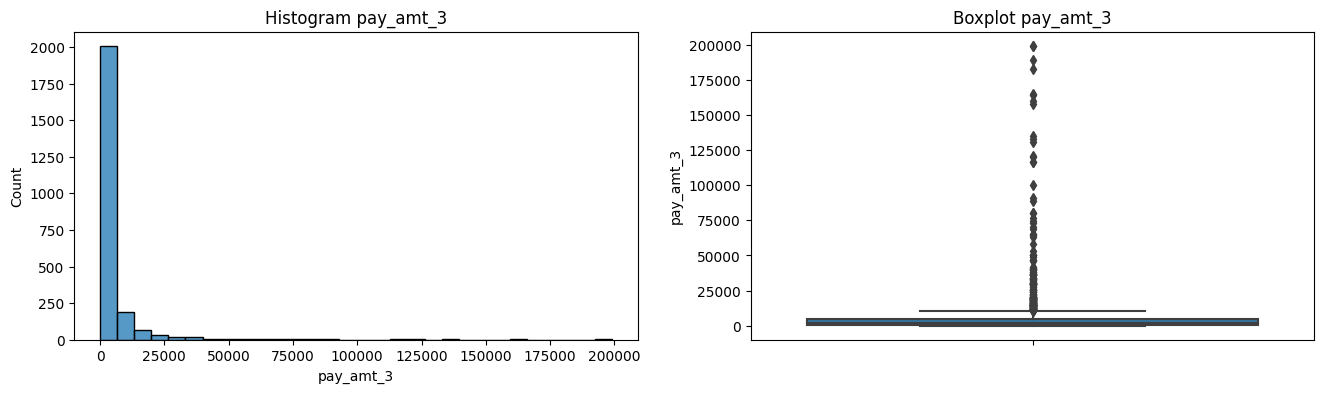


Skewness Value  pay_amt_3  :  8.09116091615788


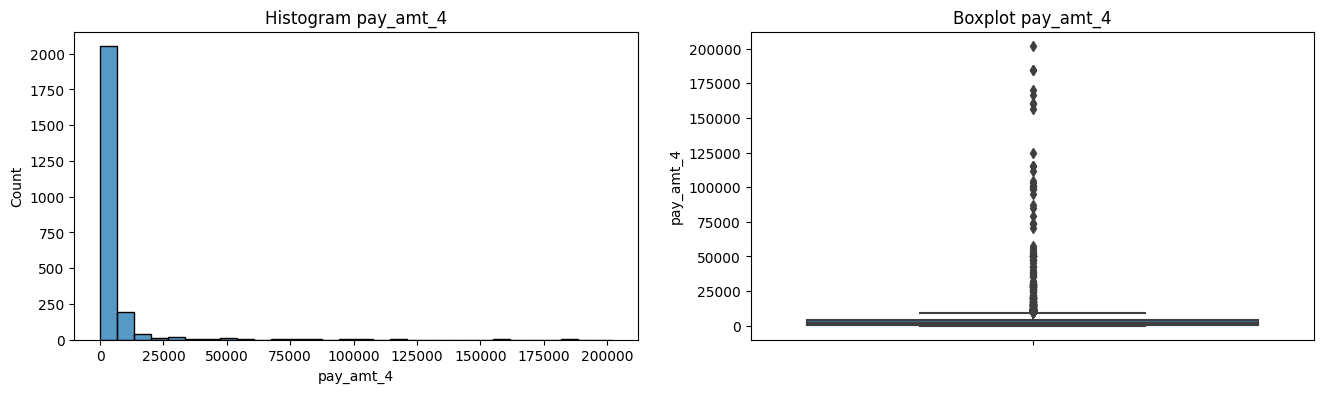


Skewness Value  pay_amt_4  :  8.18217569674665


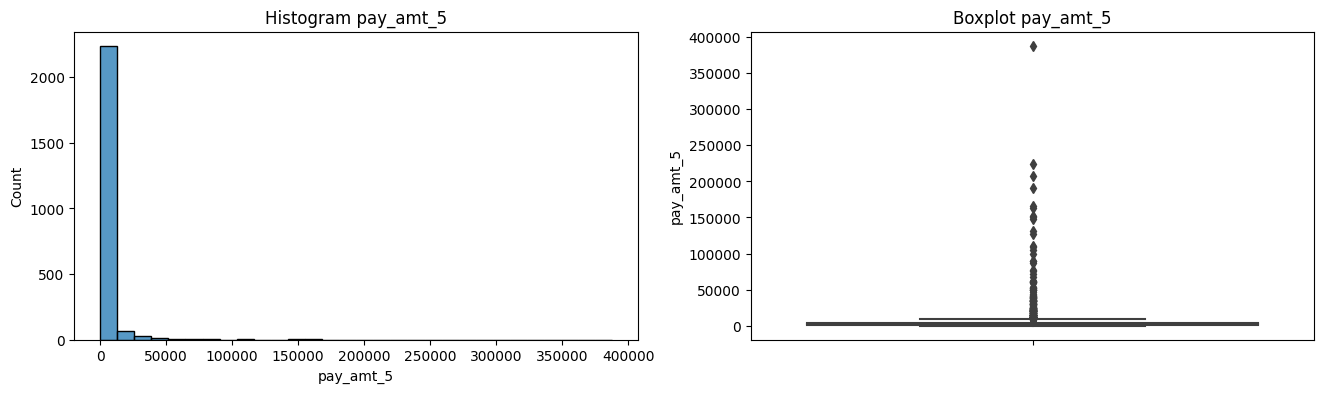


Skewness Value  pay_amt_5  :  11.62675125947987


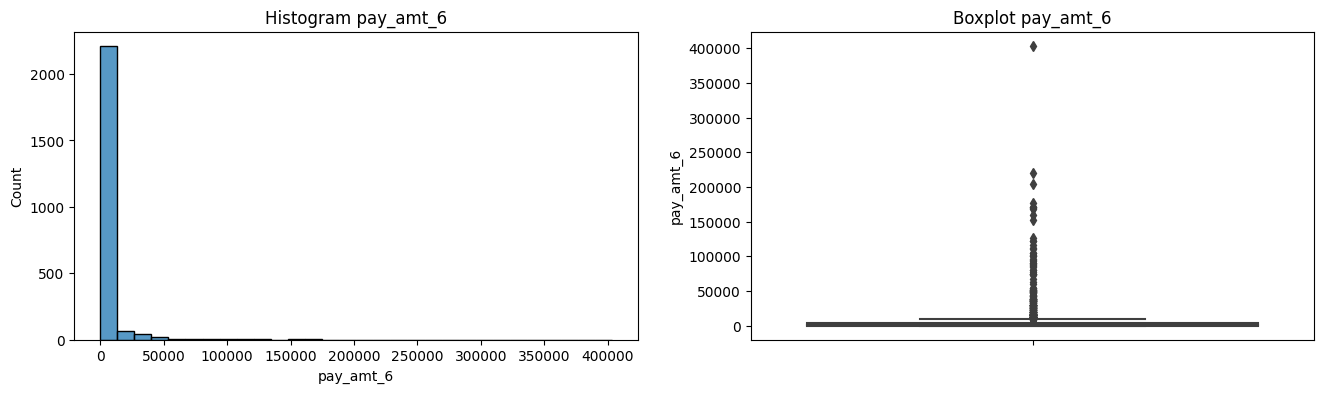


Skewness Value  pay_amt_6  :  9.515247149371904


In [52]:
#Pengecekan distribusi dan skew dari setiap feature numeric
for i in Xtrain_num_columns:
    diagnostic_plots(X_train, i)

In [53]:
# Fungis Pengecekan Outlier
def outliers_check(df,variable):
    global interq
    global lower_boundary
    global upper_boundary
    if (df[variable].skew() > 0.5 and df[variable].skew() <= 1) or (df[variable].skew() < -0.5 and df[variable].skew() >= -1):
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 1.5)
        upper_boundary = df[variable].quantile(0.75) + (interq * 1.5)
        outlier = df[(df[variable]< lower_boundary) | (df[variable]>upper_boundary)]
    elif df[variable].skew() >= 1 or df[variable].skew() <= -1:
        interq = df[variable].quantile(0.75) - df[variable].quantile(0.25)
        lower_boundary = df[variable].quantile(0.25) - (interq * 3)
        upper_boundary = df[variable].quantile(0.75) + (interq * 3)
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]
    else:
        lower_boundary = df[variable].mean() - (3 * df[variable].std())
        upper_boundary = df[variable].mean() + (3 * df[variable].std())
        outlier = df[(df[variable]<lower_boundary) | (df[variable]>upper_boundary)]

    return outlier, lower_boundary, upper_boundary

In [54]:
#Pengecekan persentase outlier dari semua feature numerical
for i in Xtrain_num_columns:
    print(i)
    print('Jumlah Outlier Feature ', i,'adalah ' ,round((len(outliers_check(X_train, i)[0])),2))
    print('Persentase Outlier Feature ', i,'adalah ' ,round((len(outliers_check(X_train, i)[0])/len(X_train)*100),2))
    print('Lower Boundary Feature ', i,'adalah ' ,round((outliers_check(X_train, i)[1]),2))
    print('Upper Boundary Feature ', i,'adalah ' ,round((outliers_check(X_train, i)[2]),2))
    print('---')

limit_balance
Jumlah Outlier Feature  limit_balance adalah  2
Persentase Outlier Feature  limit_balance adalah  0.08
Lower Boundary Feature  limit_balance adalah  -490000.0
Upper Boundary Feature  limit_balance adalah  770000.0
---
age
Jumlah Outlier Feature  age adalah  25
Persentase Outlier Feature  age adalah  1.05
Lower Boundary Feature  age adalah  8.5
Upper Boundary Feature  age adalah  60.5
---
bill_amt_1
Jumlah Outlier Feature  bill_amt_1 adalah  63
Persentase Outlier Feature  bill_amt_1 adalah  2.66
Lower Boundary Feature  bill_amt_1 adalah  -192390.5
Upper Boundary Feature  bill_amt_1 adalah  265857.5
---
bill_amt_2
Jumlah Outlier Feature  bill_amt_2 adalah  64
Persentase Outlier Feature  bill_amt_2 adalah  2.7
Lower Boundary Feature  bill_amt_2 adalah  -182568.75
Upper Boundary Feature  bill_amt_2 adalah  251308.75
---
bill_amt_3
Jumlah Outlier Feature  bill_amt_3 adalah  68
Persentase Outlier Feature  bill_amt_3 adalah  2.87
Lower Boundary Feature  bill_amt_3 adalah  -17456

In [55]:
#Mencoba cek statistik dasar dari X_train numeric feature
X_train[Xtrain_num_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
limit_balance,2372.0,164211.635750,127064.687211,10000.0,50000.00,140000.0,230000.00,800000.0
age,2372.0,35.421164,9.126235,21.0,28.00,34.0,41.00,69.0
bill_amt_1,2372.0,52959.291737,73880.592724,-11545.0,4001.50,24729.5,69465.50,613860.0
bill_amt_2,2372.0,51102.659781,71896.047725,-9850.0,3378.75,23622.5,65361.25,512650.0
bill_amt_3,2372.0,48702.699831,69291.286061,-25443.0,3268.00,21947.5,62545.25,578971.0
bill_amt_4,2372.0,44294.657251,62387.845037,-46627.0,2705.25,19942.0,57833.25,488808.0
bill_amt_5,2372.0,41241.445616,58426.563672,-46627.0,1994.50,19149.5,52992.75,441981.0
bill_amt_6,2372.0,40013.071669,57222.048358,-73895.0,1472.00,18644.5,52489.75,436172.0
pay_amt_1,2372.0,5983.185497,19115.923383,0.0,1004.75,2206.0,5041.25,493358.0
pay_amt_2,2372.0,6334.112142,31172.355774,0.0,911.25,2200.0,5009.25,1227082.0


Dari informasi diatas dapat disimpulkan bahwa semua *feature* tidak normal (*right skew*). Kemudian berdasarkan ***research* yang saya lakukan dan box-plot** maka :

- ALL *feature* ***pay amount* tidak saya handling** karena *feature* tersebut termasuk ***natural outliers***. Pada semua box-plot *feature pay amount*, bisa dilihat bahwa **outlier max berada di angka 600.000**. Sedangkan menurut *research* saya, pembayaran yang dilakukan tergantung dengan bill yang ditagihkan dan *carryover* dari siklus billing sebelumnya, sehingga *pay amount* **tidak memiliki nilai maksimal**. Dari informasi tersebut dapat disimpulkan bahwa *pay amount* dapat terdistribusi bebas mengikuti kesanggupan *customer* (https://www.thebalancemoney.com/what-happens-during-a-credit-card-billing-cycle-960200)
- ALL *feature* ***bill amount* tidak saya handling** karena *feature* tersebut termasuk ***natural outliers***. Pada semua box-plot *feature bill amount*, bisa dilihat bahwa **outlier max berada di angka 500.000**. Nilai *bill amount* sangat bervariasi tergantung dengan *behaviour* dan kondisi *financial customer*. *Bill amount* dapat melakukan *carry over* dari siklus billing sebelumnya. **Sehingga tidak terdapat nilai maksimal yang dapat ditetapkan** (https://www.investopedia.com/how-do-credit-card-payments-work-5069924)
- Menurut *research* saya untuk ***natural outlier* lebih baik tidak di-drop** karena akan sangat merubah distribusi data dan membuat distorsi perhitungan statistik, selain itu dengan dihapusnya *natural outlier*, maka **menyebabkan data tidak bisa merepresentasikan populasi/sampel** (https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/)

Mengapa tidak menggunakan *censoring*? Saya tidak menggunakan *censoring* pada *feature pay amount* dan *bill amount* karena **pada poin EDA**, bisa dilihat bahwa pada pada kelas yang tinggi **masih terdapat penurunan probabilitas** untuk dikategorikan sebagai *class default*. Oleh karena itu saya berasumsi bahwa semakin tinggi *pay amount* dan *bill amount* maka akan semakin kecil probabilitas dikategorikan sebagai *class default*. Sehingga saya tidak bisa melakukan *censoring* karena ***censoring* akan mengenaralisasi data diluar treshold** yang ditentukan sebagai nilai treshhold (https://ndgigliotti.medium.com/trimming-vs-winsorizing-outliers-e5cae0bf22cb, https://en.wikipedia.org/wiki/Winsorizing)

In [56]:
#define outlier feature age
outliers_age = outliers_check(X_train,'age')[0]
outliers_age.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1758,50000,1,2,1,61,2,-1,-1,-1,-1,-1,390,390,390,390,390,390,390,390,390,390,390,390
847,200000,2,2,1,69,0,0,0,0,0,0,45870,46907,47952,49052,49936,50977,2100,2100,2200,2000,2000,2011
133,140000,1,2,2,62,0,0,0,0,0,0,143107,138581,123491,118886,117059,117405,4839,5000,5000,7500,7000,5029
405,180000,1,1,1,63,0,0,0,0,0,0,157932,156847,130572,120464,109129,112273,7000,5500,4218,4500,5000,4000
536,200000,2,3,1,67,0,0,0,0,0,0,188072,166668,159513,150852,151996,147690,17014,15019,15000,15000,10000,10000


In [57]:
#Cek statistik deskriptif dasar outliers_age
outliers_age['age'].describe()

count    25.000000
mean     63.240000
std       2.712318
min      61.000000
25%      61.000000
50%      62.000000
75%      65.000000
max      69.000000
Name: age, dtype: float64

In [58]:
#Memperbarui outlier age dengan umur diatas 65 tahun
outliers_age = outliers_age[outliers_age['age'] >65]
outliers_age

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
847,200000,2,2,1,69,0,0,0,0,0,0,45870,46907,47952,49052,49936,50977,2100,2100,2200,2000,2000,2011
536,200000,2,3,1,67,0,0,0,0,0,0,188072,166668,159513,150852,151996,147690,17014,15019,15000,15000,10000,10000
1813,90000,2,3,1,68,-2,-2,-2,-2,-1,-1,2000,1000,1000,1000,1052,69237,0,1000,1000,1052,71062,3000
472,200000,2,2,1,69,0,0,0,0,0,0,106878,100879,102998,105090,107718,88964,4000,3800,3802,4363,3500,3303
19,150000,1,2,1,66,0,0,0,0,0,0,190790,167666,145132,148054,146358,145253,4942,4875,4085,4113,4074,4820


In [59]:
#Assign index ke variabel drop age
drop_age = outliers_age.index.to_list()

In [60]:
#Print len X_train untuk mengetahui jumlah data sebelum di-drop
len(X_train)

2372

In [61]:
#drop pada X_train dan y_train
X_train.drop(axis=0, index=drop_age,inplace=True)
y_train.drop(axis=0, index=drop_age,inplace=True)

In [62]:
#Print len X_train dan y_train setelah outlier handling
print('Len X_train setelah drop ' , len(X_train))
print('Len y_train setelah drop ' , len(y_train))

Len X_train setelah drop  2367
Len y_train setelah drop  2367


In [63]:
#define outlier feature age
outliers_balance = outliers_check(X_train,'limit_balance')[0]
outliers_balance.head()

,limit_balance,sex,education_level,marital_status,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt_1,bill_amt_2,bill_amt_3,bill_amt_4,bill_amt_5,bill_amt_6,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
14,780000,1,1,1,48,0,0,0,0,0,0,171459,178587,190663,195124,184872,191090,10000,15004,10000,8000,10028,7003
2591,800000,1,2,1,53,-1,-1,-1,0,0,-1,7639,5552,64535,40814,12590,9339,11145,64657,131,247,9366,63482


Berdasarkan hasil *research* saya, *limit balance* untuk **setiap bank penyedia layanan kredit adalah  up to >$15.147.350** (NTD/Dollar baru taiwan, karena dataset credit adalah dataset negara taiwan).**Outlier pada *feature limit balance* tidak di-drop** karena masih dibawah range maksimal dan **termasuk sebagai *natural outlier*** (https://www.cardrates.com/advice/credit-card-limits/).

In [64]:
#Pengecekan null values pada X_train
X_train.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [65]:
#Pengecekan null values pada y_train
y_train.isnull().sum()

0

In [66]:
#Pengecekan null values pada X_test
X_test.isnull().sum()

limit_balance      0
sex                0
education_level    0
marital_status     0
age                0
pay_1              0
pay_2              0
pay_3              0
pay_4              0
pay_5              0
pay_6              0
bill_amt_1         0
bill_amt_2         0
bill_amt_3         0
bill_amt_4         0
bill_amt_5         0
bill_amt_6         0
pay_amt_1          0
pay_amt_2          0
pay_amt_3          0
pay_amt_4          0
pay_amt_5          0
pay_amt_6          0
dtype: int64

In [67]:
#Pengecekan null values pada y_test
y_test.isnull().sum()

0

In [68]:
#Copy dataset untuk persiapan FE
X_train_FE = X_train.copy()
y_train_FE = y_train.copy()

In [69]:
#Definisi kolom yang perlu di encoding
Xtrain_cat_ord_columns = ['education_level','pay_1','pay_2','pay_3','pay_4','pay_5','pay_6']
Xtrain_cat_nom_columns = ['sex','marital_status']

In [70]:
#Memisahkan kolom Numerical dan Categorical (ordinal dan nominal)
X_train_num_FE = X_train_FE[Xtrain_num_columns]
X_train_cat_ord_FE = X_train_FE[Xtrain_cat_ord_columns]
X_train_cat_nom_FE = X_train_FE[Xtrain_cat_nom_columns]

In [71]:
#Definisi scaler dan fit scaler
pay_cat = [-2,-1,0,1,2,3,4,5,6,7,8,9]
edu_cat = [0,1,2,3,4,5,6]
scaler_FE = RobustScaler()
nominal_FE = OneHotEncoder()
ordinal_FE = OrdinalEncoder(categories=[edu_cat,pay_cat,pay_cat,pay_cat,pay_cat,pay_cat,pay_cat])
scaler_FE.fit(X_train_num_FE)
nominal_FE.fit(X_train_cat_nom_FE)
ordinal_FE.fit(X_train_cat_ord_FE)

OrdinalEncoder(categories=[[0, 1, 2, 3, 4, 5, 6],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [72]:
# Transform dan assign ke variabel baru
feature_FE= nominal_FE.get_feature_names_out(input_features=Xtrain_cat_nom_columns)
FE_num_scale = scaler_FE.transform(X_train_num_FE)
FE_cat_ord_dummy = ordinal_FE.transform(X_train_cat_ord_FE)
FE_cat_nom_dummy = pd.DataFrame(nominal_FE.transform(X_train_cat_nom_FE).toarray(), columns=feature_FE)

In [73]:
#concat Categorical nominal, ordinal 
FE_cat_encode = np.concatenate([FE_cat_nom_dummy, FE_cat_ord_dummy],axis=1)

In [74]:
#Definisi filter kemudian fit FE_num_scale dan y train
FE_num_filter = SelectKBest(score_func=f_classif, k='all')
score_num = FE_num_filter.fit(FE_num_scale, y_train)

In [75]:
#Selanjutnya adalah print score, mean score dan feature. Kemudian pembuatan DF untuk mempermudah interpretasi
print('Score dari setiap feature adalah : ', score_num.scores_)
print('Rata-Rata score adalah : ', score_num.scores_.mean())
df_score_num = pd.DataFrame([X_train_FE[Xtrain_num_columns].keys(),score_num.scores_,score_num.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
df_score_num['penarikan_hipotesis'] = np.where(df_score_num['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score dari setiap feature adalah :  [5.79209711e+01 2.33098192e+00 1.64517091e-02 5.90445204e-02
 3.05729556e-03 1.02932580e-02 1.68242647e-01 4.02839053e-01
 1.26140226e+01 6.99737250e+00 1.88049691e+01 5.92735190e+00
 1.08632171e+01 1.18319082e+01]
Rata-Rata score adalah :  9.139337345123831


In [76]:
#print DF dengan sort_values
df_score_num.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,penarikan_hipotesis
0,limit_balance,57.920971,0.0,H1 diterima/Berpengaruh
1,pay_amt_3,18.804969,0.000015,H1 diterima/Berpengaruh
2,pay_amt_1,12.614023,0.00039,H1 diterima/Berpengaruh
3,pay_amt_6,11.831908,0.000592,H1 diterima/Berpengaruh
4,pay_amt_5,10.863217,0.000995,H1 diterima/Berpengaruh
5,pay_amt_2,6.997373,0.008217,H1 diterima/Berpengaruh
6,pay_amt_4,5.927352,0.014981,H1 diterima/Berpengaruh
7,age,2.330982,0.126956,H0 diterima/Tidak Berpengaruh
8,bill_amt_6,0.402839,0.525688,H0 diterima/Tidak Berpengaruh
9,bill_amt_5,0.168243,0.681716,H0 diterima/Tidak Berpengaruh


In [77]:
#Assign ke variabel FE_drop_Num
FE_drop_num = ['bill_amt_1','bill_amt_2','bill_amt_3','bill_amt_4','bill_amt_5','bill_amt_6','age']
X_train.drop(columns=FE_drop_num,inplace=True)
X_test.drop(columns=FE_drop_num,inplace=True)

In [78]:
#print shape setelah drop feature numeric
print('Shape df, ', X.shape)
print('Shape X_train, ', X_train.shape)
print('Shape X_test, ', X_test.shape)

Shape df,  (2965, 23)
Shape X_train,  (2367, 16)
Shape X_test,  (593, 16)


In [79]:
#Definisi filter kemudian fit FE_cat_encode dan y_train
FE_cat_filter = SelectKBest(score_func=chi2, k='all')
score_cat = FE_cat_filter.fit(FE_cat_encode , y_train)

In [80]:
#Selanjutnya adalah print score, mean score dan feature
print('Score dari setiap feature adalah : ', score_cat.scores_)
print('Rata-Rata score adalah : ', score_cat.scores_.mean())

#Pembuatan Dataframe
column_cat_enc = np.concatenate([nominal_FE.get_feature_names_out(input_features=Xtrain_cat_nom_columns),ordinal_FE.get_feature_names_out()], axis=0)
df_score_cat = pd.DataFrame([column_cat_enc,score_cat.scores_,score_cat.pvalues_]).T.rename(columns= {0:'feature',1 :'score',2 :'p-value'})
df_score_cat['penarikan_hipotesis'] = np.where(df_score_cat['p-value'] < 0.05 , 'H1 diterima/Berpengaruh', 'H0 diterima/Tidak Berpengaruh')

Score dari setiap feature adalah :  [2.75342501e-01 1.82337064e-01 2.73265196e-01 2.05015228e+00
 1.35485858e+00 1.01179065e+00 3.55446586e+00 1.92591965e+02
 1.55096905e+02 1.40338143e+02 1.17200295e+02 1.17478532e+02
 1.10547328e+02]
Rata-Rata score adalah :  64.76579836678148


In [81]:
#Print df dengan sort
df_score_cat.sort_values(by='score',ascending=False).reset_index(drop=True)

,feature,score,p-value,penarikan_hipotesis
0,pay_1,192.591965,0.0,H1 diterima/Berpengaruh
1,pay_2,155.096905,0.0,H1 diterima/Berpengaruh
2,pay_3,140.338143,0.0,H1 diterima/Berpengaruh
3,pay_5,117.478532,0.0,H1 diterima/Berpengaruh
4,pay_4,117.200295,0.0,H1 diterima/Berpengaruh
5,pay_6,110.547328,0.0,H1 diterima/Berpengaruh
6,education_level,3.554466,0.059385,H0 diterima/Tidak Berpengaruh
7,marital_status_1,2.050152,0.152191,H0 diterima/Tidak Berpengaruh
8,marital_status_2,1.354859,0.244431,H0 diterima/Tidak Berpengaruh
9,marital_status_3,1.011791,0.314474,H0 diterima/Tidak Berpengaruh


In [82]:
#Assign ke variabel FE_drop_cat
FE_drop_cat = ['education_level','marital_status','sex']
X_train.drop(columns=FE_drop_cat,inplace=True)
X_test.drop(columns=FE_drop_cat,inplace=True)

In [83]:
#print shape setelah drop feature categorical
print('Shape df, ', X.shape)
print('Shape X_train, ', X_train.shape)
print('Shape X_test, ', X_test.shape)
print('Feature yang akan digunakan untuk modelling', X_train.columns.to_list() )

Shape df,  (2965, 23)
Shape X_train,  (2367, 13)
Shape X_test,  (593, 13)
Feature yang akan digunakan untuk modelling ['limit_balance', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']


In [84]:
#Memisahkan kolom numerical dan categorical
num_columns_final = ['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_columns_final = ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

print('Num Columns : ', num_columns_final)
print('Cat Columns : ', cat_columns_final)

Num Columns :  ['limit_balance', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
Cat Columns :  ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']


In [85]:
# split train dan tes berdasarkan kategori kolom

X_train_num = X_train[num_columns_final]
X_test_num = X_test[num_columns_final]

X_train_cat = X_train[cat_columns_final]
X_test_cat = X_test[cat_columns_final]

In [86]:
#print x_train_num
X_train_num

,limit_balance,pay_amt_1,pay_amt_2,pay_amt_3,pay_amt_4,pay_amt_5,pay_amt_6
1597,30000,1900,1600,2000,2000,614,924
973,100000,4000,3105,4069,3000,2500,2000
218,240000,8491,9600,8896,10690,223765,9395
1544,50000,3000,2000,2000,2000,3000,1000
1887,360000,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1679,20000,4000,0,1000,0,1237,1000
2851,290000,15837,11584,8184,14936,19573,6309
926,200000,1502,1200,300,7000,8000,4000
221,30000,2000,2500,3000,178,1000,0


In [87]:
#Pengecekan skewness pada tiap feature numerical

for i in num_columns_final: 
    print('X_train feature ', i, ' skew ', X_train_num[i].skew())

X_train feature  limit_balance  skew  1.0529958619176116
X_train feature  pay_amt_1  skew  12.842029179149113
X_train feature  pay_amt_2  skew  28.817018775418816
X_train feature  pay_amt_3  skew  8.085511164535484
X_train feature  pay_amt_4  skew  8.176869368274316
X_train feature  pay_amt_5  skew  11.717571293878212
X_train feature  pay_amt_6  skew  9.505701957184682


In [88]:
# Definisi scaler dan fit scaler
scaler_final = RobustScaler()
scaler_final.fit(X_train_num)

RobustScaler()

In [89]:
#Transform X_train dan X_test
X_train_num_scaled = scaler_final.transform(X_train_num)
X_test_num_scaled = scaler_final.transform(X_test_num)

In [90]:
#print x_train_num_scaled
X_train_num_scaled

array([[-6.11111111e-01, -7.43126084e-02, -1.46038700e-01, ...,
         1.02134558e-01, -2.88247146e-01, -1.72207362e-01],
       [-2.22222222e-01,  4.45875650e-01,  2.20275040e-01, ...,
         3.72331802e-01,  2.18401612e-01,  1.01897847e-01],
       [ 5.55555556e-01,  1.55833540e+00,  1.80114397e+00, ...,
         2.45014861e+00,  5.96582942e+01,  1.98573430e+00],
       ...,
       [ 3.33333333e-01, -1.72900669e-01, -2.43397834e-01, ...,
         1.45312078e+00,  1.69590329e+00,  6.11387084e-01],
       [-6.11111111e-01, -4.95417389e-02,  7.30193501e-02, ...,
        -3.90164820e-01, -1.84553392e-01, -4.07591390e-01],
       [ 3.88888889e-01, -4.95417389e-02,  7.30193501e-02, ...,
        -1.68062686e-01,  6.21356615e-01,  6.11387084e-01]])

In [91]:
#Define dan fit X_train_cat
encoder_final = OrdinalEncoder(categories=[pay_cat,pay_cat,pay_cat,pay_cat,pay_cat,pay_cat])
encoder_final.fit(X_train_cat)

OrdinalEncoder(categories=[[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                           [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [92]:
#Transform X_train dan X_test
X_train_cat_encoded = encoder_final.transform(X_train_cat)
X_test_cat_encoded = encoder_final.transform(X_test_cat)

In [93]:
#Menampilkan hasil concat
X_test_cat_encoded

array([[3., 0., 0., 1., 2., 2.],
       [3., 0., 0., 0., 0., 0.],
       [2., 2., 2., 2., 2., 2.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [2., 2., 2., 2., 2., 0.],
       [2., 2., 2., 2., 2., 2.]])

In [94]:
# Concate Columns numerical dan categorial

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_train_final

array([[-0.61111111, -0.07431261, -0.1460387 , ...,  2.        ,
         2.        ,  2.        ],
       [-0.22222222,  0.44587565,  0.22027504, ...,  2.        ,
         2.        ,  2.        ],
       [ 0.55555556,  1.5583354 ,  1.80114397, ...,  2.        ,
         2.        ,  2.        ],
       ...,
       [ 0.33333333, -0.17290067, -0.24339783, ...,  2.        ,
         2.        ,  2.        ],
       [-0.61111111, -0.04954174,  0.07301935, ...,  2.        ,
         2.        ,  2.        ],
       [ 0.38888889, -0.04954174,  0.07301935, ...,  2.        ,
         2.        ,  2.        ]])

In [95]:
#Pendefinisian Model
model_log = LogisticRegression()
model_svm = SVC(probability= True, random_state=42)
model_tree = DecisionTreeClassifier(random_state=43)
model_forest = RandomForestClassifier(random_state=44)
model_knn = KNeighborsClassifier()
model_bayes = GaussianNB()
model_gpc = GaussianProcessClassifier(random_state=44)


In [96]:
#Fit X_train_final dan y_train ke model Logistic Regression
model_log.fit(X_train_final,y_train)

LogisticRegression()

In [97]:
#prediksi X_train final dan X_test Logistic Regression
y_train_pred_log = model_log.predict(X_train_final)
y_test_pred_log = model_log.predict(X_test_final)

In [98]:
#Fit X_train_final dan y_train ke model Support Vector Machine
model_svm.fit(X_train_final,y_train)

SVC(probability=True, random_state=42)

In [99]:
#prediksi X_train final dan X_test Support Vector Machine
y_train_pred_svm = model_svm.predict(X_train_final)
y_test_pred_svm = model_svm.predict(X_test_final)

In [100]:
#Fit X_train_final dan y_train ke model Decision Tree
model_tree.fit(X_train_final,y_train)

DecisionTreeClassifier(random_state=43)

In [101]:
#prediksi X_train final dan X_test Decision Tree
y_train_pred_tree = model_tree.predict(X_train_final)
y_test_pred_tree = model_tree.predict(X_test_final)

In [102]:
#Fit X_train_final dan y_train ke model Random Forest
model_forest.fit(X_train_final,y_train)

RandomForestClassifier(random_state=44)

In [103]:
#prediksi X_train final dan X_test Random Forest
y_train_pred_forest = model_forest.predict(X_train_final)
y_test_pred_forest = model_forest.predict(X_test_final)

In [104]:
#Fit X_train_final dan y_train ke model KNN
model_knn.fit(X_train_final,y_train)

KNeighborsClassifier()

In [105]:
#prediksi X_train final dan X_test KNN
y_train_pred_knn = model_knn.predict(X_train_final)
y_test_pred_knn = model_knn.predict(X_test_final)

In [106]:
#Fit X_train_final dan y_train ke model Naive Bayes
model_bayes.fit(X_train_final,y_train)

GaussianNB()

In [107]:
#prediksi X_train final dan X_test Naive Bayes
y_train_pred_bayes = model_bayes.predict(X_train_final)
y_test_pred_bayes = model_bayes.predict(X_test_final)

In [108]:
#Fit X_train_final dan y_train ke model GPC
model_gpc.fit(X_train_final,y_train)

GaussianProcessClassifier(random_state=44)

In [109]:
#prediksi X_train final dan X_test GPC
y_train_pred_gpc = model_gpc.predict(X_train_final)
y_test_pred_gpc = model_gpc.predict(X_test_final)

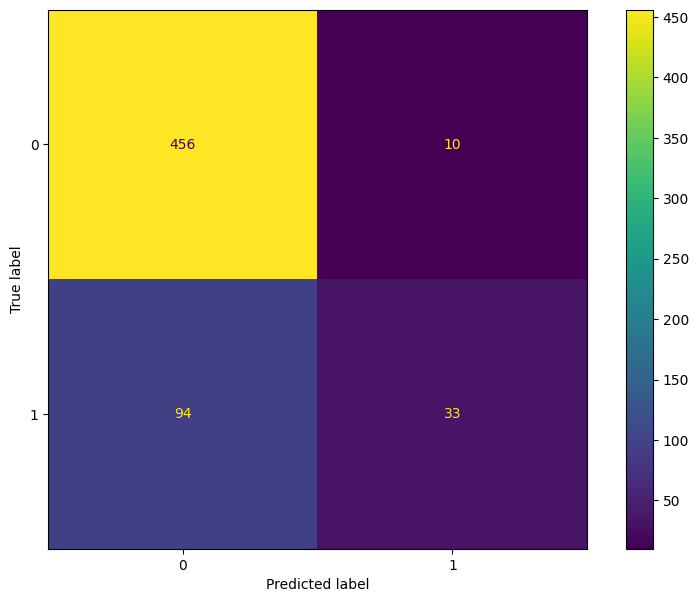

In [110]:
#Model Evaluation Confussion Matrix Test-Set Logistic Regression
cm_test_log = confusion_matrix(y_test, y_test_pred_log)
ConfusionMatrixDisplay(cm_test_log).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model Logistic Regression cenderung memprediksi ke kelas *no default***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class default(94 kesalahan)*, kesalahan tersebut di-prediksi sebagai *class no default*. Sedangkan prediksi *class no default* hanya ada sedikit kesalahan (10 kesalahan). Kesalahan ini diprediksi sebagai kelas *default*


In [111]:
# Model Evaluation - Train Set Logistic Regression
print(classification_report(y_train, y_train_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1859
           1       0.76      0.30      0.43       508

    accuracy                           0.83      2367
   macro avg       0.80      0.64      0.67      2367
weighted avg       0.82      0.83      0.80      2367



In [112]:
#Perhitungan ROC-AUC Test Logistic Regression Train
y_pred_proba_log_train = model_log.predict_proba(X_train_final)[:, 1]
auc_log_train = roc_auc_score(y_train, y_pred_proba_log_train)
auc_log_train

0.7550949202221158

In [113]:
#Penentuan KFold untuk all model
skfold=StratifiedKFold(n_splits=5)

In [114]:
# Model Evaluation - Train Set Stratified KFold Logistic Regression
scores_log=cross_val_score(model_log,X_train_final,y_train,cv=skfold,scoring="roc_auc")

print('AUC-Score - All - Cross Validation  Logistic Regression : ', scores_log)
print('AUC-Score - Mean - Cross Validation Logistic Regression : ', scores_log.mean())
print('AUC-Score - Std - Cross Validation Logistic Regression : ', scores_log.std())
print('AUC-Score - Range of Train-Set Logistic Regression : ', (scores_log.mean()-scores_log.std()) , '-', (scores_log.mean()+scores_log.std()))

AUC-Score - All - Cross Validation  Logistic Regression :  [0.72020609 0.7511596  0.78375879 0.74705898 0.71103481]
AUC-Score - Mean - Cross Validation Logistic Regression :  0.742643655320027
AUC-Score - Std - Cross Validation Logistic Regression :  0.02563214224450349
AUC-Score - Range of Train-Set Logistic Regression :  0.7170115130755235 - 0.7682757975645305


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan stratifikasi 5 Split-5 Fold), **Model Logistic Regression** memiliki **rata-rata** nilai `AUC-Score` yang tidak jauh dari hasil *classification report train-set* yaitu **0.74**. Secara bisnis artinya, model terpengaruh dengan treshold
- `AUC-Score` hasil stratifikasi 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.03**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`AUC-Score` dari setiap split tidak berbeda jauh**
- `AUC-Score` untuk *train-set* memiliki **range** **0.71-0.77** (setelah diuji dengan 5 Split-5 Fold)



In [115]:
# Model Evaluation - Test Set Logistic Regression
print(classification_report(y_test, y_test_pred_log))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       466
           1       0.77      0.26      0.39       127

    accuracy                           0.82       593
   macro avg       0.80      0.62      0.64       593
weighted avg       0.82      0.82      0.79       593



In [116]:
#Perhitungan ROC-AUC Test Logistic Regression
y_pred_proba_log = model_log.predict_proba(X_test_final)[:, 1]
auc_log = roc_auc_score(y_test, y_pred_proba_log)
auc_log

0.7550353147916596

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***default*** pada *train* dan *test* sangat rendah. Untuk *train* di angka 0.43 sedangkan untuk *test* di angka 0.39. Yang artinya **model tersebut *underfit***
- Berdasarkan nilai *AUC (hasil validasi)* (0.75) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **82%** (akan tetapi cenderung mengklasifikasikan ke kelas ***no default***)
- Presisi :

Presisi Kelas *no default* : Dari semua yg diprediksi sebagai ***kelas no default*** hanya 83%(456 *customer*) yg benar, 17%(94 *customer*) salah prediksi. 17%(94 *customer*) ini diprediksi sebagai *kelas no default* padahal aslinya *default*

Presisi Kelas *default* : Dari semua yg diprediksi sebagai ***kelas default*** hanya 77%(33 *customer*) yg benar, 23%(10 *customer*) salah prediksi. 23%(10 *customer*) ini diprediksi sebagai *kelas default* padahal aslinya *no default*

- Recall :

Recall Kelas *no default* : Dari semua ***kelas no default*** hanya 98%(456 *customer*) yg diprediksi benar. 2%(10 *customer*) ini harusnya atau aktualnya adalah *kelas no default* tetapi diprediksi sebagai *kelas default*

Recall Kelas *default* : Dari semua ***kelas default*** hanya 26%(33 *customer*) yg diprediksi benar. 74%(94 *customer*) ini harusnya atau aktualnya adalah *kelas default* tetapi diprediksi sebagai *kelas no default*

- Secara bisnis, **Model Logistic Regression** tidak dapat melakukan prediksi yang tepat pada kelas *default* (hasil prediksi banyak FN dan FP nya)

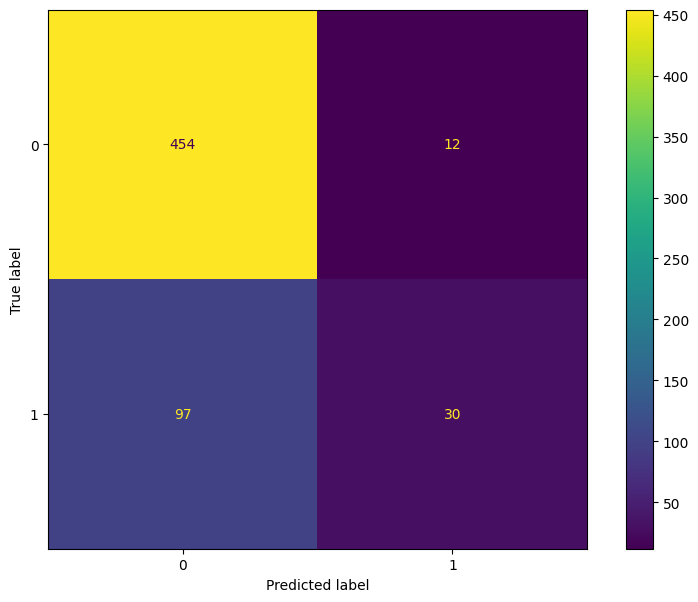

In [117]:
#Model Evaluation Confussion Matrix Test-Set SVM
cm_test_svm = confusion_matrix(y_test, y_test_pred_svm)
ConfusionMatrixDisplay(cm_test_svm).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model SVM cenderung memprediksi ke kelas *no default***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class default(97 kesalahan)*, kesalahan tersebut di-prediksi sebagai *class no default*. Sedangkan prediksi *class no default* hanya ada sedikit kesalahan (12 kesalahan). Kesalahan ini diprediksi sebagai kelas *default*

In [118]:
# Model Evaluation - Train Set SVM
print(classification_report(y_train, y_train_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1859
           1       0.73      0.31      0.43       508

    accuracy                           0.83      2367
   macro avg       0.78      0.64      0.67      2367
weighted avg       0.81      0.83      0.80      2367



In [119]:
#Perhitungan ROC-AUC Test SVM Train
y_pred_proba_svm_train = model_svm.predict_proba(X_train_final)[:, 1]
auc_svm_train = roc_auc_score(y_train, y_pred_proba_svm_train)
auc_svm_train

0.7747884308302236

In [120]:
# Model Evaluation - Train Set Stratified KFold SVM
scores_svm=cross_val_score(model_svm,X_train_final,y_train,cv=skfold,scoring="roc_auc")

print('AUC-Score - All - Cross Validation  SVM : ', scores_svm)
print('AUC-Score - Mean - Cross Validation SVM : ', scores_svm.mean())
print('AUC-Score - Std - Cross Validation SVM : ', scores_svm.std())
print('AUC-Score - Range of Train-Set SVM : ', (scores_svm.mean()-scores_svm.std()) , '-', (scores_svm.mean()+scores_svm.std()))

AUC-Score - All - Cross Validation  SVM :  [0.71899378 0.76807927 0.78862111 0.72568668 0.71457468]
AUC-Score - Mean - Cross Validation SVM :  0.7431911057391025
AUC-Score - Std - Cross Validation SVM :  0.029644969871436663
AUC-Score - Range of Train-Set SVM :  0.7135461358676659 - 0.7728360756105391


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan stratifikasi 5 Split-5 Fold), **Model SVM** memiliki **rata-rata** nilai `AUC-Score` yang tidak jauh dari hasil *classification report train-set* yaitu **0.74**. Secara bisnis artinya, model terpengaruh treshold
- `AUC-Score` hasil stratifikasi 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.03**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`AUC-Score` dari setiap split tidak berbeda jauh**
- `AUC-Score` untuk *train-set* memiliki **range** **0.71-0.77** (setelah diuji dengan 5 Split-5 Fold)



In [121]:
# Model Evaluation - Test Set SVM
print(classification_report(y_test, y_test_pred_svm))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       466
           1       0.71      0.24      0.36       127

    accuracy                           0.82       593
   macro avg       0.77      0.61      0.62       593
weighted avg       0.80      0.82      0.78       593



In [122]:
#Perhitungan ROC-AUC Test SVM
y_pred_proba_svm = model_svm.predict_proba(X_test_final)[:, 1]
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
auc_svm

0.7180054746375587

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***default*** pada *train* dan *test* sangat rendah. Untuk *train* di angka 0.43 sedangkan untuk *test* di angka 0.36. Yang artinya **model tersebut *underfit***
- Berdasarkan nilai *AUC(hasil validasi)* (0.74) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **82%** (akan tetapi cenderung mengklasifikasikan ke kelas ***no default***)
- Presisi :

Presisi Kelas *no default* : Dari semua yg diprediksi sebagai ***kelas no default*** hanya 82%(454 *customer*) yg benar, 18%(97 *customer*) salah prediksi. 18%(97 *customer*) ini diprediksi sebagai *kelas no default* padahal aslinya *default*

Presisi Kelas *default* : Dari semua yg diprediksi sebagai ***kelas default*** hanya 71%(30 *customer*) yg benar, 29%(12 *customer*) salah prediksi. 23%(12 *customer*) ini diprediksi sebagai *kelas default* padahal aslinya *no default*

- Recall :

Recall Kelas *no default* : Dari semua ***kelas no default*** hanya 97%(454 *customer*) yg diprediksi benar. 3%(12 *customer*) ini harusnya atau aktualnya adalah *kelas no default* tetapi diprediksi sebagai *kelas default*

Recall Kelas *default* : Dari semua ***kelas default*** hanya 24%(30 *customer*) yg diprediksi benar. 76%(97 *customer*) ini harusnya atau aktualnya adalah *kelas default* tetapi diprediksi sebagai *kelas no default*

- Secara bisnis, **Model SVM** tidak dapat melakukan prediksi yang tepat pada kelas *default* (hasil prediksi banyak FN dan FP nya)

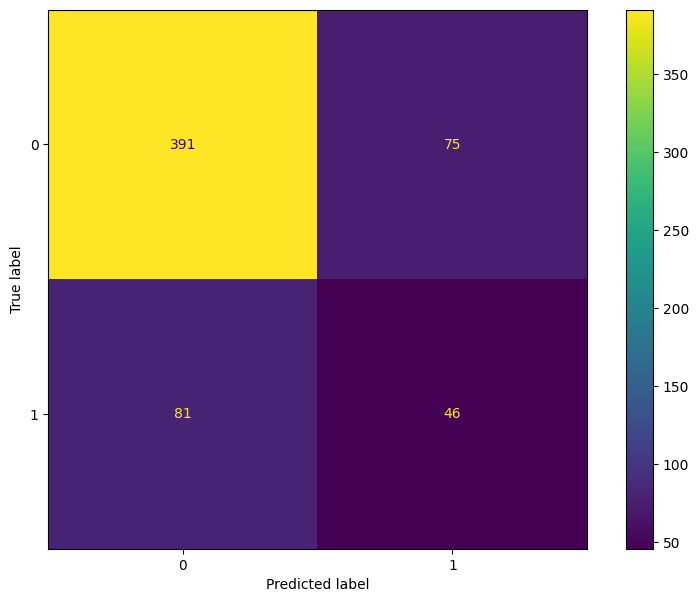

In [123]:
#Model Evaluation Confussion Matrix Test-Set Decision Tree
cm_test_tree = confusion_matrix(y_test, y_test_pred_tree)
ConfusionMatrixDisplay(cm_test_tree).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model Decision Tree cenderung memprediksi ke kelas *no default***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class default(81 kesalahan)*, kesalahan tersebut di-prediksi sebagai *class no default*. Sedangkan prediksi *class no default* hanya ada sedikit kesalahan (75 kesalahan). Kesalahan ini diprediksi sebagai kelas *default*

In [124]:
# Model Evaluation - Train Set Decision Tree
print(classification_report(y_train, y_train_pred_tree))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1859
           1       0.99      0.98      0.99       508

    accuracy                           0.99      2367
   macro avg       0.99      0.99      0.99      2367
weighted avg       0.99      0.99      0.99      2367



In [125]:
#Perhitungan ROC-AUC Test Decision Tree Train
y_pred_proba_tree_train = model_tree.predict_proba(X_train_final)[:, 1]
auc_tree_train = roc_auc_score(y_train, y_pred_proba_tree_train)
auc_tree_train

0.9999041691197961

In [126]:
# Model Evaluation - Train Set Stratified KFold Decision Tree
scores_tree=cross_val_score(model_tree,X_train_final,y_train,cv=skfold,scoring="roc_auc")

print('AUC-Score - All - Cross Validation  Decision Tree : ', scores_tree)
print('AUC-Score - Mean - Cross Validation Decision Tree : ', scores_tree.mean())
print('AUC-Score - Std - Cross Validation Decision Tree : ', scores_tree.std())
print('AUC-Score - Range of Train-Set Decision Tree : ', (scores_tree.mean()-scores_tree.std()) , '-', (scores_tree.mean()+scores_tree.std()))

AUC-Score - All - Cross Validation  Decision Tree :  [0.63403964 0.67593032 0.62121452 0.61384808 0.64099595]
AUC-Score - Mean - Cross Validation Decision Tree :  0.6372057024119735
AUC-Score - Std - Cross Validation Decision Tree :  0.021565167571824133
AUC-Score - Range of Train-Set Decision Tree :  0.6156405348401494 - 0.6587708699837976


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan stratifikasi 5 Split-5 Fold), **Model Decision Tree** memiliki **rata-rata** nilai `AUC-Score` yang jauh dari hasil *classification report train-set* yaitu **0.63**. Secara bisnis artinya, model terpengaruh treshold
- `AUC-Score` hasil stratifikasi 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.02**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`AUC-Score` dari setiap split tidak berbeda jauh**
- `AUC-Score` untuk *train-set* memiliki **range** **0.61-0.66** (setelah diuji dengan 5 Split-5 Fold)



In [127]:
# Model Evaluation - Test Set Decision Tree
print(classification_report(y_test, y_test_pred_tree))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       466
           1       0.38      0.36      0.37       127

    accuracy                           0.74       593
   macro avg       0.60      0.60      0.60       593
weighted avg       0.73      0.74      0.73       593



In [128]:
#Perhitungan ROC-AUC Test Decision Tree
y_pred_proba_tree = model_tree.predict_proba(X_test_final)[:, 1]
auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
auc_tree

0.608428238315704

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***default*** pada *train* dan *test* memiliki selisih jauh. Untuk *train* di angka 0.99 sedangkan untuk *test* di angka 0.37. Yang artinya **model tersebut *overfit***
- Berdasarkan nilai *AUC(hasil validasi)* (0.63) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **74%** (akan tetapi cenderung mengklasifikasikan ke kelas ***no default***)
- Presisi :

Presisi Kelas *no default* : Dari semua yg diprediksi sebagai ***kelas no default*** hanya 83%(391 *customer*) yg benar, 17%(81 *customer*) salah prediksi. 17%(81 *customer*) ini diprediksi sebagai *kelas no default* padahal aslinya *default*

Presisi Kelas *default* : Dari semua yg diprediksi sebagai ***kelas default*** hanya 38%(46 *customer*) yg benar, 62%(75 *customer*) salah prediksi. 62%(75 *customer*) ini diprediksi sebagai *kelas default* padahal aslinya *no default*

- Recall :

Recall Kelas *no default* : Dari semua ***kelas no default*** hanya 84%(391 *customer*) yg diprediksi benar. 16%(75 *customer*) ini harusnya atau aktualnya adalah *kelas no default* tetapi diprediksi sebagai *kelas default*

Recall Kelas *default* : Dari semua ***kelas default*** hanya 36%(46 *customer*) yg diprediksi benar. 64%(81 *customer*) ini harusnya atau aktualnya adalah *kelas default* tetapi diprediksi sebagai *kelas no default*

- Secara bisnis, **Model Decision Tree** tidak dapat melakukan prediksi yang tepat pada kelas *default* (hasil prediksi banyak FN dan FP nya)

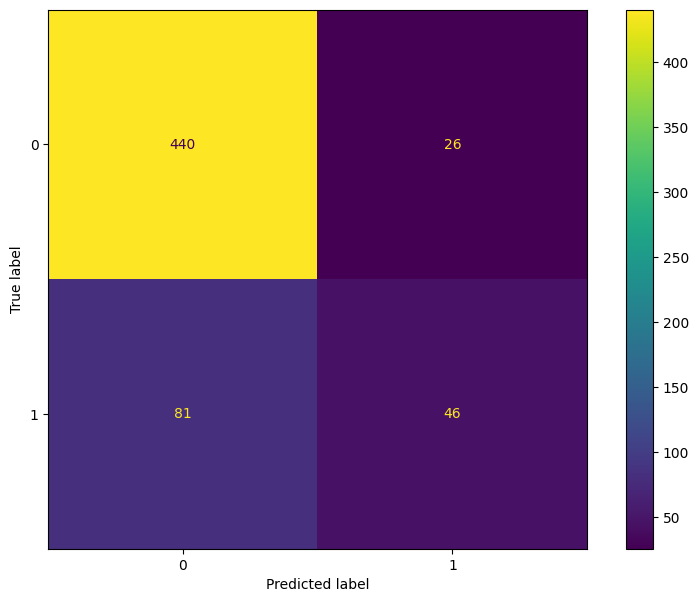

In [129]:
#Model Evaluation Confussion Matrix Test-Set Random Forest
cm_test_forest = confusion_matrix(y_test, y_test_pred_forest)
ConfusionMatrixDisplay(cm_test_forest).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model Random Forest cenderung memprediksi ke kelas *no default***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class default(81 kesalahan)*, kesalahan tersebut di-prediksi sebagai *class no default*. Sedangkan prediksi *class no default* hanya ada sedikit kesalahan (26 kesalahan). Kesalahan ini diprediksi sebagai kelas *default*

In [130]:
# Model Evaluation - Train Set Random Forest
print(classification_report(y_train, y_train_pred_forest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1859
           1       0.99      0.99      0.99       508

    accuracy                           0.99      2367
   macro avg       0.99      0.99      0.99      2367
weighted avg       0.99      0.99      0.99      2367



In [131]:
#Perhitungan ROC-AUC Test Random Forest Train
y_pred_proba_forest_train = model_forest.predict_proba(X_train_final)[:, 1]
auc_forest_train = roc_auc_score(y_train, y_pred_proba_forest_train)
auc_forest_train

0.9995229634084873

In [132]:
# Model Evaluation - Train Set Stratified KFold Random Forest
scores_forest=cross_val_score(model_forest,X_train_final,y_train,cv=skfold,scoring="roc_auc")

print('AUC-Score - All - Cross Validation  Random Forest : ', scores_forest)
print('AUC-Score - Mean - Cross Validation Random Forest : ', scores_forest.mean())
print('AUC-Score - Std - Cross Validation Random Forest : ', scores_forest.std())
print('AUC-Score - Range of Train-Set Random Forest : ', (scores_forest.mean()-scores_forest.std()) , '-', (scores_forest.mean()+scores_forest.std()))

AUC-Score - All - Cross Validation  Random Forest :  [0.72820472 0.78456409 0.77259394 0.73320558 0.76063292]
AUC-Score - Mean - Cross Validation Random Forest :  0.7558402514389748
AUC-Score - Std - Cross Validation Random Forest :  0.021930644586887503
AUC-Score - Range of Train-Set Random Forest :  0.7339096068520873 - 0.7777708960258624


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan stratifikasi 5 Split-5 Fold), **Model Random Forest** memiliki **rata-rata** nilai `AUC-Score` yang jauh dari hasil *classification report train-set* yaitu **0.75**. Secara bisnis artinya, model terpengaruh treshold
- `AUC-Score` hasil stratifikasi 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.02**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`AUC-Score` dari setiap split tidak berbeda jauh**
- `AUC-Score` untuk *train-set* memiliki **range** **0.73-0.77** (setelah diuji dengan 5 Split-5 Fold)



In [133]:
# Model Evaluation - Test Set Random Forest
print(classification_report(y_test, y_test_pred_forest))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       466
           1       0.64      0.36      0.46       127

    accuracy                           0.82       593
   macro avg       0.74      0.65      0.68       593
weighted avg       0.80      0.82      0.80       593



In [134]:
#Perhitungan ROC-AUC Test Random Forest
y_pred_proba_forest = model_forest.predict_proba(X_test_final)[:, 1]
auc_forest = roc_auc_score(y_test, y_pred_proba_forest)
auc_forest

0.7274002230407894

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***default*** pada *train* dan *test* memiliki selisih jauh. Untuk *train* di angka 0.99 sedangkan untuk *test* di angka 0.46. Yang artinya **model tersebut *overfit***
- Berdasarkan nilai *AUC(hasil validasi)* (0.75) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **82%** (akan tetapi cenderung mengklasifikasikan ke kelas ***no default***)
- Presisi :

Presisi Kelas *no default* : Dari semua yg diprediksi sebagai ***kelas no default*** hanya 84%(440 *customer*) yg benar, 16%(81 *customer*) salah prediksi. 16%(81 *customer*) ini diprediksi sebagai *kelas no default* padahal aslinya *default*

Presisi Kelas *default* : Dari semua yg diprediksi sebagai ***kelas default*** hanya 64%(46 *customer*) yg benar, 36%(26 *customer*) salah prediksi. 36%(26 *customer*) ini diprediksi sebagai *kelas default* padahal aslinya *no default*

- Recall :

Recall Kelas *no default* : Dari semua ***kelas no default*** hanya 94%(440 *customer*) yg diprediksi benar. 6%(26 *customer*) ini harusnya atau aktualnya adalah *kelas no default* tetapi diprediksi sebagai *kelas default*

Recall Kelas *default* : Dari semua ***kelas default*** hanya 36%(46 *customer*) yg diprediksi benar. 64%(81 *customer*) ini harusnya atau aktualnya adalah *kelas default* tetapi diprediksi sebagai *kelas no default*

- Secara bisnis, **Model Random Forest** tidak dapat melakukan prediksi yang tepat pada kelas *default* (hasil prediksi banyak FN dan FP nya)

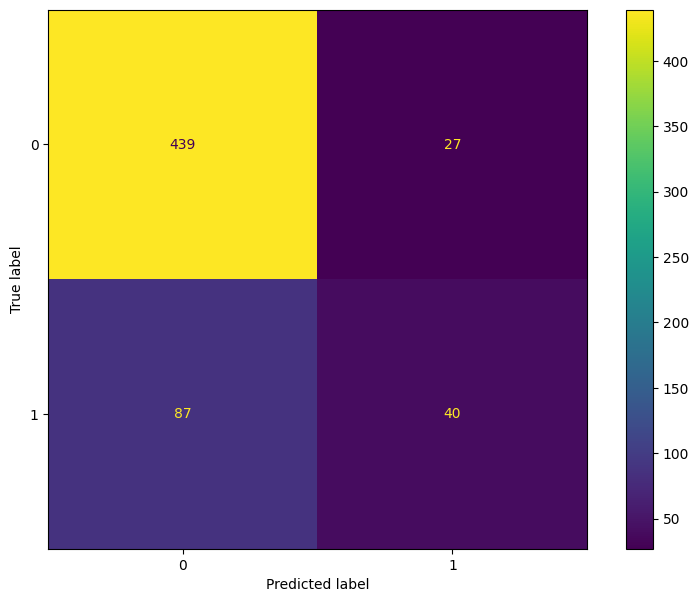

In [135]:
#Model Evaluation Confussion Matrix Test-Set KNN
cm_test_knn = confusion_matrix(y_test, y_test_pred_knn)
ConfusionMatrixDisplay(cm_test_knn).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model KNN cenderung memprediksi ke kelas *no default***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class default(87 kesalahan)*, kesalahan tersebut di-prediksi sebagai *class no default*. Sedangkan prediksi *class no default* hanya ada sedikit kesalahan (27 kesalahan). Kesalahan ini diprediksi seabgai kelas *default*

In [136]:
# Model Evaluation - Train Set KNN
print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1859
           1       0.74      0.49      0.59       508

    accuracy                           0.85      2367
   macro avg       0.81      0.72      0.75      2367
weighted avg       0.84      0.85      0.84      2367



In [137]:
#Perhitungan ROC-AUC Test KNN Train
y_pred_proba_knn_train = model_knn.predict_proba(X_train_final)[:, 1]
auc_knn_train = roc_auc_score(y_train, y_pred_proba_knn_train)
auc_knn_train

0.8882564286107594

In [138]:
# Model Evaluation - Train Set Stratified KFold KNN
scores_knn=cross_val_score(model_knn,X_train_final,y_train,cv=skfold,scoring="roc_auc")

print('AUC-Score - All - Cross Validation  KNN : ', scores_knn)
print('AUC-Score - Mean - Cross Validation KNN : ', scores_knn.mean())
print('AUC-Score - Std - Cross Validation KNN : ', scores_knn.std())
print('AUC-Score - Range of Train-Set KNN : ', (scores_knn.mean()-scores_knn.std()) , '-', (scores_knn.mean()+scores_knn.std()))

AUC-Score - All - Cross Validation  KNN :  [0.6790797  0.71133776 0.7310528  0.67366656 0.72957255]
AUC-Score - Mean - Cross Validation KNN :  0.7049418740034776
AUC-Score - Std - Cross Validation KNN :  0.024398178738125043
AUC-Score - Range of Train-Set KNN :  0.6805436952653526 - 0.7293400527416026


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan stratifikasi 5 Split-5 Fold), **Model KNN** memiliki **rata-rata** nilai `AUC-Score` yang jauh dari hasil *classification report train-set* yaitu **0.70**. Secara bisnis artinya, model terpengaruh treshold
- `AUC-Score` hasil stratifikasi 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.02**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`AUC-Score` dari setiap split tidak berbeda jauh**
- `AUC-Score` untuk *train-set* memiliki **range** **0.68-0.72** (setelah diuji dengan 5 Split-5 Fold)



In [139]:
# Model Evaluation - Test Set KNN
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.94      0.89       466
           1       0.60      0.31      0.41       127

    accuracy                           0.81       593
   macro avg       0.72      0.63      0.65       593
weighted avg       0.78      0.81      0.78       593



In [140]:
#Perhitungan ROC-AUC Test KNN
y_pred_proba_knn = model_knn.predict_proba(X_test_final)[:, 1]
auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
auc_knn

0.706549288635058

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***default*** pada *train* dan *test* sangat rendah. Untuk *train* di angka 0.59 sedangkan untuk *test* di angka 0.41. Yang artinya **model tersebut *underfit***
- Berdasarkan nilai *AUC(Hasil validasi)* (0.70) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **81%** (akan tetapi cenderung mengklasifikasikan ke kelas ***no default***)
- Presisi :

Presisi Kelas *no default* : Dari semua yg diprediksi sebagai ***kelas no default*** hanya 83%(439 *customer*) yg benar, 17%(87 *customer*) salah prediksi. 17%(87 *customer*) ini diprediksi sebagai *kelas no default* padahal aslinya *default*

Presisi Kelas *default* : Dari semua yg diprediksi sebagai ***kelas default*** hanya 60%(40 *customer*) yg benar, 40%(27 *customer*) salah prediksi. 40%(27 *customer*) ini diprediksi sebagai *kelas default* padahal aslinya *no default*

- Recall :

Recall Kelas *no default* : Dari semua ***kelas no default*** hanya 94%(439 *customer*) yg diprediksi benar. 6%(27 *customer*) ini harusnya atau aktualnya adalah *kelas no default* tetapi diprediksi sebagai *kelas default*

Recall Kelas *default* : Dari semua ***kelas default*** hanya 31%(40 *customer*) yg diprediksi benar. 69%(87 *customer*) ini harusnya atau aktualnya adalah *kelas default* tetapi diprediksi sebagai *kelas no default*

- Secara bisnis, **Model KNN** tidak dapat melakukan prediksi yang tepat pada kelas *default* (hasil prediksi banyak FN dan FP nya)

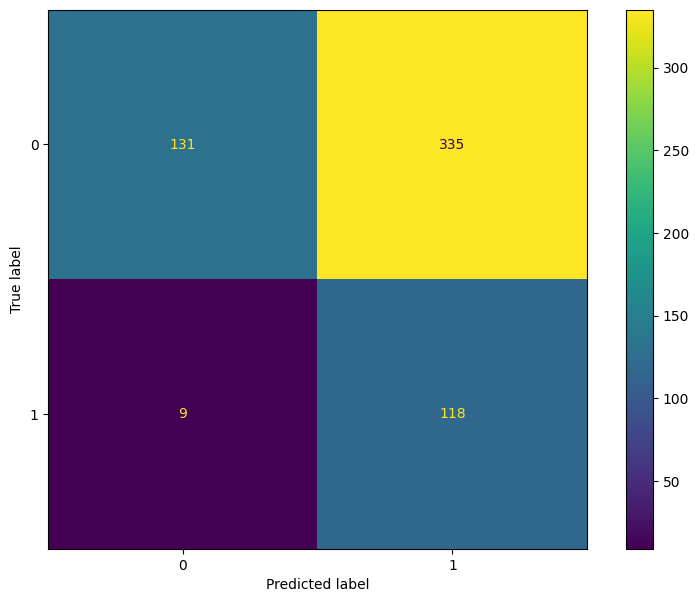

In [141]:
#Model Evaluation Confussion Matrix Test-Set Bayes
cm_test_bayes = confusion_matrix(y_test, y_test_pred_bayes)
ConfusionMatrixDisplay(cm_test_bayes).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model Naive Bayes cenderung memprediksi ke kelas *default***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class no default(335 kesalahan)*, kesalahan tersebut di-prediksi sebagai *class default*. Sedangkan prediksi *class default* hanya ada sedikit kesalahan (9 kesalahan). Kesalahan ini diprediksi seabgai kelas *default*

In [142]:
# Model Evaluation - Train Set Bayes
print(classification_report(y_train, y_train_pred_bayes))

              precision    recall  f1-score   support

           0       0.90      0.28      0.43      1859
           1       0.25      0.89      0.39       508

    accuracy                           0.41      2367
   macro avg       0.58      0.59      0.41      2367
weighted avg       0.76      0.41      0.42      2367



In [143]:
#Perhitungan ROC-AUC Test Bayes Train
y_pred_proba_bayes_train = model_bayes.predict_proba(X_train_final)[:, 1]
auc_bayes_train = roc_auc_score(y_train, y_pred_proba_bayes_train)
auc_bayes_train

0.7384764690185647

In [144]:
# Model Evaluation - Train Set Stratified KFold Bayes
scores_bayes=cross_val_score(model_bayes,X_train_final,y_train,cv=skfold,scoring="roc_auc")

print('AUC-Score - All - Cross Validation  Bayes : ', scores_bayes)
print('AUC-Score - Mean - Cross Validation Bayes : ', scores_bayes.mean())
print('AUC-Score - Std - Cross Validation Bayes : ', scores_bayes.std())
print('AUC-Score - Range of Train-Set Bayes : ', (scores_bayes.mean()-scores_bayes.std()) , '-', (scores_bayes.mean()+scores_bayes.std()))

AUC-Score - All - Cross Validation  Bayes :  [0.70382669 0.73850938 0.77435125 0.75360641 0.71201959]
AUC-Score - Mean - Cross Validation Bayes :  0.7364626644464495
AUC-Score - Std - Cross Validation Bayes :  0.026062281467700846
AUC-Score - Range of Train-Set Bayes :  0.7104003829787486 - 0.7625249459141503


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan stratifikasi 5 Split-5 Fold), **Model Bayes** memiliki **rata-rata** nilai `AUC-Score` yang tidak jauh dari hasil *classification report train-set* yaitu **0.73**. Secara bisnis artinya, model terpengaruh treshold
- `AUC-Score` hasil stratifikasi 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.03**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`AUC-Score` dari setiap split tidak berbeda jauh**
- `AUC-Score` untuk *train-set* memiliki **range** **0.71-0.76** (setelah diuji dengan 5 Split-5 Fold)



In [145]:
# Model Evaluation - Test Set Bayes
print(classification_report(y_test, y_test_pred_bayes))

              precision    recall  f1-score   support

           0       0.94      0.28      0.43       466
           1       0.26      0.93      0.41       127

    accuracy                           0.42       593
   macro avg       0.60      0.61      0.42       593
weighted avg       0.79      0.42      0.43       593



In [146]:
#Perhitungan ROC-AUC Test Bayes
y_pred_proba_bayes = model_bayes.predict_proba(X_test_final)[:, 1]
auc_bayes = roc_auc_score(y_test, y_pred_proba_bayes)
auc_bayes

0.7649369740799569

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***default*** pada *train* dan *test* sangat rendah. Untuk *train* di angka 0.39 sedangkan untuk *test* di angka 0.41. Yang artinya **model tersebut *underfit***
- Berdasarkan nilai *AUC(hasil validasi)* (0.73) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **42%** (akan tetapi cenderung mengklasifikasikan ke kelas ***default***)
- Presisi :

Presisi Kelas *no default* : Dari semua yg diprediksi sebagai ***kelas no default*** hanya 94%(131 *customer*) yg benar, 6%(9 *customer*) salah prediksi. 6%(9 *customer*) ini diprediksi sebagai *kelas no default* padahal aslinya *default*

Presisi Kelas *default* : Dari semua yg diprediksi sebagai ***kelas default*** hanya 26%(118 *customer*) yg benar, 74%(335 *customer*) salah prediksi. 74%(335 *customer*) ini diprediksi sebagai *kelas default* padahal aslinya *no default*

- Recall :

Recall Kelas *no default* : Dari semua ***kelas no default*** hanya 28%(131 *customer*) yg diprediksi benar. 72%(335 *customer*) ini harusnya atau aktualnya adalah *kelas no default* tetapi diprediksi sebagai *kelas default*

Recall Kelas *default* : Dari semua ***kelas default*** hanya 93%(118 *customer*) yg diprediksi benar. 7%(9 *customer*) ini harusnya atau aktualnya adalah *kelas default* tetapi diprediksi sebagai *kelas no default*

- Secara bisnis, **Model Bayes** tidak dapat melakukan prediksi yang tepat pada kelas *no default* (hasil prediksi banyak FN dan FP nya)

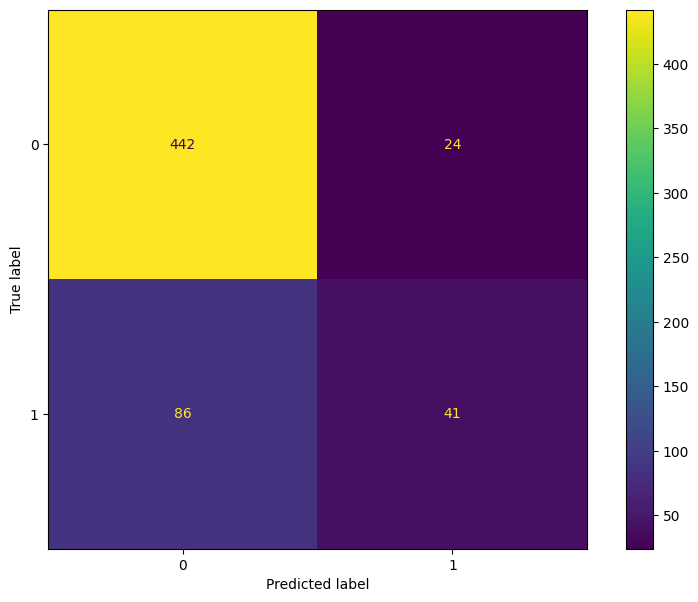

In [147]:
#Model Evaluation Confussion Matrix Test-Set GPC
cm_test_gpc = confusion_matrix(y_test, y_test_pred_gpc)
ConfusionMatrixDisplay(cm_test_gpc).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model GPC cenderung memprediksi ke kelas *no default***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class default(86 kesalahan)*, kesalahan tersebut di-prediksi sebagai *class no default*. Sedangkan prediksi *class no default* hanya ada sedikit kesalahan (24 kesalahan). Kesalahan ini diprediksi seabgai kelas *default*

In [148]:
# Model Evaluation - Train Set GPC
print(classification_report(y_train, y_train_pred_gpc))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1859
           1       0.88      0.61      0.72       508

    accuracy                           0.90      2367
   macro avg       0.89      0.79      0.83      2367
weighted avg       0.90      0.90      0.89      2367



In [149]:
#Perhitungan ROC-AUC Test GPC Train
y_pred_proba_gpc_train = model_gpc.predict_proba(X_train_final)[:, 1]
auc_gpc_train = roc_auc_score(y_train, y_pred_proba_gpc_train)
auc_gpc_train

0.8044610598365898

In [150]:
# Model Evaluation - Train Set Stratified KFold GPC
scores_gpc=cross_val_score(model_gpc,X_train_final,y_train,cv=skfold,scoring="roc_auc")

print('AUC-Score - All - Cross Validation  GPC : ', scores_gpc)
print('AUC-Score - Mean - Cross Validation GPC : ', scores_gpc.mean())
print('AUC-Score - Std - Cross Validation GPC : ', scores_gpc.std())
print('AUC-Score - Range of Train-Set GPC : ', (scores_gpc.mean()-scores_gpc.std()) , '-', (scores_gpc.mean()+scores_gpc.std()))

AUC-Score - All - Cross Validation  GPC :  [0.67150274 0.72762492 0.71523704 0.61270361 0.67646119]
AUC-Score - Mean - Cross Validation GPC :  0.6807059007212116
AUC-Score - Std - Cross Validation GPC :  0.040300921244868226
AUC-Score - Range of Train-Set GPC :  0.6404049794763433 - 0.7210068219660799


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan stratifikasi 5 Split-5 Fold), **Model GPC** memiliki **rata-rata** nilai `AUC-Score` yang tidak jauh dari hasil *classification report train-set* yaitu **0.68**. Secara bisnis artinya, model terpengaruh treshold
- `AUC-Score` hasil stratifikasi 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.04**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`AUC-Score` dari setiap split tidak berbeda jauh**
- `AUC-Score` untuk *train-set* memiliki **range** **0.64-0.72** (setelah diuji dengan 5 Split-5 Fold)



In [151]:
# Model Evaluation - Test Set GPC
print(classification_report(y_test, y_test_pred_gpc))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       466
           1       0.63      0.32      0.43       127

    accuracy                           0.81       593
   macro avg       0.73      0.64      0.66       593
weighted avg       0.79      0.81      0.79       593



In [152]:
#Perhitungan ROC-AUC Test GPC
y_pred_proba_gpc = model_gpc.predict_proba(X_test_final)[:, 1]
auc_gpc = roc_auc_score(y_test, y_pred_proba_gpc)
auc_gpc

0.6710570781656585

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***default*** pada *train dan test* sangat rendah. Untuk *train* di angka 0.72 sedangkan untuk *test* di angka 0.43. Yang artinya **model tersebut *underfit***
- Berdasarkan nilai *AUC(Hasil validasi)* (0.68) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **81%** (akan tetapi cenderung mengklasifikasikan ke kelas ***no default***)
- Presisi :

Presisi Kelas *no default* : Dari semua yg diprediksi sebagai ***kelas no default*** hanya 84%(442 *customer*) yg benar, 16%(86 *customer*) salah prediksi. 16%(86 *customer*) ini diprediksi sebagai *kelas no default* padahal aslinya *default*

Presisi Kelas *default* : Dari semua yg diprediksi sebagai ***kelas default*** hanya 63%(41 *customer*) yg benar, 37%(24 *customer*) salah prediksi. 37%(24 *customer*) ini diprediksi sebagai *kelas default* padahal aslinya *no default*

- Recall :

Recall Kelas *no default* : Dari semua ***kelas no default*** hanya 95%(442 *customer*) yg diprediksi benar. 5%(24 *customer*) ini harusnya atau aktualnya adalah *kelas no default* tetapi diprediksi sebagai *kelas default*

Recall Kelas *default* : Dari semua ***kelas default*** hanya 32%(41 *customer*) yg diprediksi benar. 68%(86 *customer*) ini harusnya atau aktualnya adalah *kelas default* tetapi diprediksi sebagai *kelas no default*

- Secara bisnis, **Model GPC** tidak dapat melakukan prediksi yang tepat pada kelas *default* (hasil prediksi banyak FN dan FP nya)

In [153]:
#Pembuatan list kolom performansi semua model
eval_accu = [accuracy_score(y_test, y_test_pred_log),accuracy_score(y_test, y_test_pred_svm),accuracy_score(y_test, y_test_pred_tree),accuracy_score(y_test, y_test_pred_forest),accuracy_score(y_test, y_test_pred_knn),accuracy_score(y_test, y_test_pred_bayes),accuracy_score(y_test, y_test_pred_gpc)]
eval_recall = [recall_score(y_test, y_test_pred_log),recall_score(y_test, y_test_pred_svm),recall_score(y_test, y_test_pred_tree),recall_score(y_test, y_test_pred_forest),recall_score(y_test, y_test_pred_knn),recall_score(y_test, y_test_pred_bayes),recall_score(y_test, y_test_pred_gpc)]
eval_prec = [precision_score(y_test, y_test_pred_log),precision_score(y_test, y_test_pred_svm),precision_score(y_test, y_test_pred_tree),precision_score(y_test, y_test_pred_forest),precision_score(y_test, y_test_pred_knn),precision_score(y_test, y_test_pred_bayes),precision_score(y_test, y_test_pred_gpc)]
eval_f1 = [f1_score(y_test, y_test_pred_log),f1_score(y_test, y_test_pred_svm),f1_score(y_test, y_test_pred_tree),f1_score(y_test, y_test_pred_forest),f1_score(y_test, y_test_pred_knn),f1_score(y_test, y_test_pred_bayes),f1_score(y_test, y_test_pred_gpc)]
eval_auc =[auc_log, auc_svm, auc_tree, auc_forest, auc_knn, auc_bayes, auc_gpc]
eval_kfold_mean = [scores_log.mean(), scores_svm.mean(), scores_tree.mean(), scores_forest.mean(), scores_knn.mean(), scores_bayes.mean(), scores_gpc.mean()]

In [154]:
#Membuat dataframe performansi
df_model_eval = pd.DataFrame([eval_accu, eval_f1, eval_recall,eval_prec ,eval_auc, eval_kfold_mean], index=['Accuracy-(test-set)','F1_Score-(test-set)','Recall-(test-set)', 'Precision-(test-set)','AUC-(test-set)','Strat-KFold(AUC)-(train-set)'], columns=['Logistic_Regression','SVM','Decision_Tree','Random_Forest','KNN','Bayes','GPC']).T

In [155]:
#Menampilkan dataframe performansi
df_model_eval = df_model_eval.round(decimals=2)
df_model_eval.sort_values(by='Strat-KFold(AUC)-(train-set)', ascending=False)

,Accuracy-(test-set),F1_Score-(test-set),Recall-(test-set),Precision-(test-set),AUC-(test-set),Strat-KFold(AUC)-(train-set)
Random_Forest,0.82,0.46,0.36,0.64,0.73,0.76
Logistic_Regression,0.82,0.39,0.26,0.77,0.76,0.74
SVM,0.82,0.36,0.24,0.71,0.72,0.74
Bayes,0.42,0.41,0.93,0.26,0.76,0.74
KNN,0.81,0.41,0.31,0.60,0.71,0.70
GPC,0.81,0.43,0.32,0.63,0.67,0.68
Decision_Tree,0.74,0.37,0.36,0.38,0.61,0.64


Dari informasi diatas, **Model Random Forest** dipilih karena :

- **Berdasarkan model definition, saya akan memprioritaskan metric Strat-KFold, F1-Score dan ROC-AUC** (dengan prioritas utama Strat-KFold). Jika diliat pada tabel diatas, **Model Random forest memiliki Strat-KFold tertinggi**. Kemudian jika mengacu pada F1-Score, **Model Random Forest** memiliki **F1-Score paling tinggi**. Selain itu Random Forest juga memiliki akurasi dan AUC Score yang cukup tinggi dibandingkan model lainnya. Oleh karena itu model ini dipilih
- Secara bisnis, **Model Random Forest** dapat mengklasifikasikan kelas *credit score* lebih baik dari pada model lainnya (meskipun masih ada beberapa kelemahan tapi model ini lebih baik dari model lainnya)

In [156]:
#Definisikan parameter yang akan dicoba
param_grid = {
    'bootstrap': [True],
    'max_depth': [10,30,50,70, 90, 100],
    'max_features': ['sqrt', 'log2',None],
    'n_estimators': [100, 200, 300, 400,500,700,1000, None],
    'criterion': ['gini', 'entropy']

}

In [157]:
#Assign ke dalam variabel grid search
grid_search = GridSearchCV(estimator=model_forest, param_grid=param_grid, n_jobs=-1, cv=5, scoring='f1',error_score=0)

In [158]:
#fit random grid search
grid_search.fit(X_train_final,y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to 0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py", line 396, in fit
    self._validate_estimator()
  File "c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ense

GridSearchCV(cv=5, error_score=0,
             estimator=RandomForestClassifier(random_state=44), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 30, 50, 70, 90, 100],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 400, 500, 700, 1000,
                                          None]},
             scoring='f1')

In [159]:
#Cek parameter best
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=44)

In [160]:
#define model dan fit
model_forest_opt = grid_search.best_estimator_
model_forest_opt.fit(X_train_final,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=44)

In [161]:
# Model Prediction model optimasi
y_pred_train_opt = model_forest_opt.predict(X_train_final)
y_pred_test_opt = model_forest_opt.predict(X_test_final)

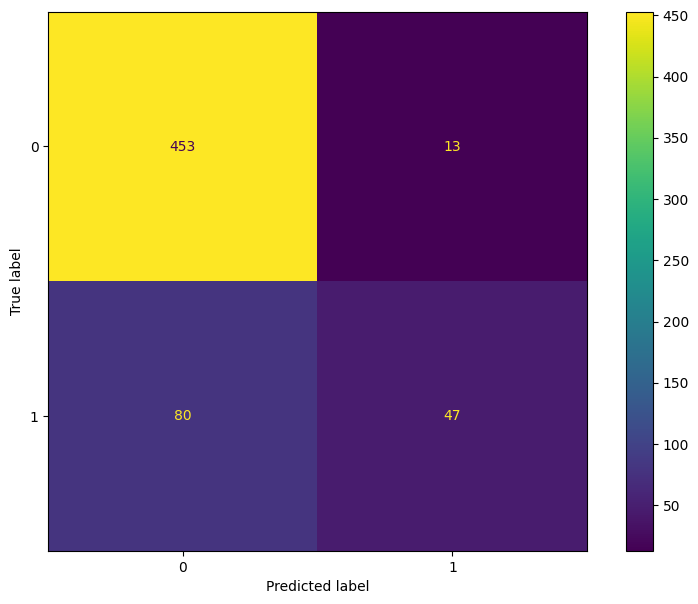

In [162]:
#Model Evaluation Confussion Matrix Random Forest Parameter Tuning
cm_test_opt = confusion_matrix(y_test, y_pred_test_opt)
ConfusionMatrixDisplay(cm_test_opt).plot()

Dari *matrix* diatas dapat disimpulkan bahwa :

- **Model Random Forest Parameter Tuning cenderung memprediksi ke kelas *no default***. Karena bisa dilihat, model ini banyak kesalahan dalam memprediksi *class default(80 kesalahan)*, kesalahan tersebut di-prediksi sebagai *class no default*. Sedangkan prediksi *class no default* hanya ada sedikit kesalahan (13 kesalahan). Kesalahan ini diprediksi sebagai kelas *default*

In [163]:
# Model Evaluation - Train Set Random Forest Parameter Tuning

print(classification_report(y_train, y_pred_train_opt))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1859
           1       0.98      0.56      0.71       508

    accuracy                           0.90      2367
   macro avg       0.94      0.78      0.83      2367
weighted avg       0.91      0.90      0.89      2367



In [164]:
#Perhitungan ROC-AUC Test Random Forest Parameter tuning
y_pred_proba_opt_train = model_forest_opt.predict_proba(X_train_final)[:, 1]
auc_opt_train = roc_auc_score(y_train, y_pred_proba_opt_train)
auc_opt_train

0.961348388135184

In [165]:
# Model Evaluation - Train Set Stratified KFold Random Forest Opt
scores_opt=cross_val_score(model_forest_opt,X_train_final,y_train,cv=skfold,scoring="roc_auc")

print('AUC-Score - All - Cross Validation  RF(Opt) : ', scores_opt)
print('AUC-Score - Mean - Cross Validation RF(Opt) : ', scores_opt.mean())
print('AUC-Score - Std - Cross Validation RF(Opt) : ', scores_opt.std())
print('AUC-Score - Range of Train-Set RF(Opt) : ', (scores_opt.mean()-scores_opt.std()) , '-', (scores_opt.mean()+scores_opt.std()))

AUC-Score - All - Cross Validation  RF(Opt) :  [0.7387334  0.80039005 0.79393267 0.74277387 0.75920899]
AUC-Score - Mean - Cross Validation RF(Opt) :  0.7670077944119642
AUC-Score - Std - Cross Validation RF(Opt) :  0.025639304039933856
AUC-Score - Range of Train-Set RF(Opt) :  0.7413684903720303 - 0.7926470984518981


Dari informasi diatas dapat disimpulkan bahwa:

- Setelah di-validasi (dengan stratifikasi 5 Split-5 Fold), **Model Random Forest** memiliki **rata-rata** nilai `AUC-Score` yang jauh dari hasil *classification report train-set* yaitu **0.76**. Secara bisnis artinya, model terpengaruh treshold
- `AUC-Score` hasil stratifikasi 5 Split-5 Fold memiliki **standar deviasi** yang rendah yaitu **0.03**. Yang artinya setelah di-test dengan 5 Split-5 Fold, **`AUC-Score` dari setiap split tidak berbeda jauh**
- `AUC-Score` untuk *train-set* memiliki **range** **0.74-0.79** (setelah diuji dengan 5 Split-5 Fold)



In [166]:
# Model Evaluation - Test Set Random Forest Parameter Tuning
print(classification_report(y_test, y_pred_test_opt))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       466
           1       0.78      0.37      0.50       127

    accuracy                           0.84       593
   macro avg       0.82      0.67      0.70       593
weighted avg       0.84      0.84      0.82       593



In [167]:
#Perhitungan ROC-AUC Test Random Forest Parameter Tuning
y_pred_proba_opt = model_forest_opt.predict_proba(X_test_final)[:, 1]
auc_opt = roc_auc_score(y_test, y_pred_proba_opt)
auc_opt

0.766618228515427

Dari perbandingan *score* hasil prediksi *train* dan *test* dapat disimpulkan bahwa :

- Nilai `f1-score` untuk kelas ***default*** pada *train* dan *test* memiliki nilai yang rendah. Untuk *train* di angka 0.71 sedangkan untuk *test* di angka 0.5. Yang artinya **model tersebut *underfit***
- Berdasarkan nilai *AUC(hasil validasi)* (0.76) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***
- Model memiliki akurasi **84%** (akan tetapi cenderung mengklasifikasikan ke kelas ***no default***)
- Presisi :

Presisi Kelas *no default* : Dari semua yg diprediksi sebagai ***kelas no default*** hanya 85%(453 *customer*) yg benar, 15%(80 *customer*) salah prediksi. 15%(80 *customer*) ini diprediksi sebagai *kelas no default* padahal aslinya *default*

Presisi Kelas *default* : Dari semua yg diprediksi sebagai ***kelas default*** hanya 78%(47 *customer*) yg benar, 22%(13 *customer*) salah prediksi. 22%(13 *customer*) ini diprediksi sebagai *kelas default* padahal aslinya *no default*

- Recall :

Recall Kelas *no default* : Dari semua ***kelas no default*** hanya 97%(453 *customer*) yg diprediksi benar. 3%(13 *customer*) ini harusnya atau aktualnya adalah *kelas no default* tetapi diprediksi sebagai *kelas default*

Recall Kelas *default* : Dari semua ***kelas default*** hanya 37%(47 *customer*) yg diprediksi benar. 63%(80 *customer*) ini harusnya atau aktualnya adalah *kelas default* tetapi diprediksi sebagai *kelas no default*

- Secara bisnis, **Model Random Forest Opt** tidak dapat melakukan prediksi yang tepat pada kelas *default* (hasil prediksi banyak FN dan FP nya)

In [168]:
#Membuat list
column_list = ['Accuracy-(test-set)','F1_Score-(test-set)','Recall-(test-set)', 'Precision-(test-set)','AUC-(test-set)','Strat-KFold(AUC)-(train-set)']
model_list=['Logistic_Regression','SVM','Decision_Tree','Random_Forest','KNN','Bayes','GPC','Random_Forest_Parameter_Tuning']

In [169]:
#Append score dari Random forest parameter tuning
eval_accu.append(accuracy_score(y_test, y_pred_test_opt))
eval_recall.append(recall_score(y_test, y_pred_test_opt))
eval_prec.append(precision_score(y_test, y_pred_test_opt))
eval_f1.append(f1_score(y_test, y_pred_test_opt))
eval_auc.append(auc_opt)
eval_kfold_mean.append(scores_opt.mean())


In [170]:
#Membuat dataframe performansi
df_eval_final = pd.DataFrame([eval_accu, eval_f1, eval_recall,eval_prec ,eval_auc, eval_kfold_mean], index=column_list, columns=model_list).T

In [171]:
#Menampilkan evaluasi
df_eval_final = df_eval_final.round(decimals=2)
df_eval_final.sort_values(by='Strat-KFold(AUC)-(train-set)', ascending=False)

,Accuracy-(test-set),F1_Score-(test-set),Recall-(test-set),Precision-(test-set),AUC-(test-set),Strat-KFold(AUC)-(train-set)
Random_Forest_Parameter_Tuning,0.84,0.50,0.37,0.78,0.77,0.77
Random_Forest,0.82,0.46,0.36,0.64,0.73,0.76
Logistic_Regression,0.82,0.39,0.26,0.77,0.76,0.74
SVM,0.82,0.36,0.24,0.71,0.72,0.74
Bayes,0.42,0.41,0.93,0.26,0.76,0.74
KNN,0.81,0.41,0.31,0.60,0.71,0.70
GPC,0.81,0.43,0.32,0.63,0.67,0.68
Decision_Tree,0.74,0.37,0.36,0.38,0.61,0.64


Dari informasi diatas dapat disimpulkan bahwa :
- Meskipun masih belum bisa mengklasifikasikan kelas *default* dengan baik akan tetapi model ini secara *overall* lebih baik dari pada *Random Forest Baseline* (FP dan FN lebih rendah)
- Dari segi-metrics model ini *outperform* model random forest baseline (semua *metrics*)

In [172]:
# Save the Files

with open('scaler_final.pkl', 'wb') as file_1:
  pickle.dump(scaler_final, file_1)

with open('encoder_final.pkl', 'wb') as file_2:
  pickle.dump(encoder_final, file_2)

with open('model_forest_opt.pkl', 'wb') as file_3:
  pickle.dump(model_forest_opt, file_3)

with open('num_columns_final.txt', 'w') as file_4:
  json.dump(num_columns_final, file_4)

with open('cat_columns_final.txt', 'w') as file_5:
  json.dump(cat_columns_final, file_5)

Dari penelitian diatas dapat diambil kesimpulan bahwa :

- Industri *credit card* sudah ada selama beberapa dekade. Industri ini adalah hasil dari perubahan *consumer habits* dan naiknya *national income*. Jumlah penerbit *credit card*, bank penerbit dan volume transaksi terus meningkat secara signifikan. Dengan meningkatnya volume transaksi, maka jumlah tunggakan dan tingkat tunggakan pinjaman *credit card* juga menjadi masalah yang tidak dapat diabaikan. Penyelesaian masalah ini sangat penting terhadap kemajuan industri *credit card*. **Oleh karena itu dibutuhkan model yang baik untuk memprediksi status dari *customer* dengan tujuan untuk memperlancar perputaran uang dari negara.**

- Sebelum membuat model, pastinya saya perlu explorasi lebih mengenai faktor-faktor apa saja yang berpengaruh ke dalam pengklasifikasian *credit card customer*. Berikut hasil eksplorasi saya :

    **Demografi Customer**

    1. *Customer* memiliki `age` rata-rata **35** tahun dengan rentang  **21 - 69** tahun, akan tetapi meskipun range umur tinggi, jumlah % *class default* **tidak berbeda setiap kelasnya**. Sehingga umur tidak begitu mempengaruhi klasifikasi *credit card* (**korelasi lemah**).Oleh karena itu tidak saya gunakan dalam perancangan model

    2. Gender **pria** memiliki **probabilitas** lebih **besar** untuk diklasifikasikan sebagai ***class default***, karena setelah dibandingkan dengan *marital status* dan *education level* yang sama dengan gender wanita, gender pria mendominasi hampir di seluruh kelas. Akan tetapi karena hanya berbeda 0.2%. Maka dapat disimpulkan *gender* berkorelasi lemah dengan klasifikasi *credit card*. Oleh karena itu tidak saya gunakan dalam perancangan model

    3. *Customer* yang **dominan** adalah *customer* dengan *education level* university. Setelah university yang dominan adalah grad school kemudian disusul dengan high school. Akan tetapi dari hasil uji hipotesis, proprosi kelas *credit card* pada setiap *education level* tidak jauh berbeda. Sehingga bisa disimpulkan bahwa *feature* ini berkorelasi lemah. Oleh karena itu tidak saya gunakan dalam perancangan model

    4. *Customer* **banyak** yang memiliki ***marital status* single** (sekitar 1.500) kemudian disusul dengan marital status married (sekitar 1.300).Akan tetapi dari hasil uji hipotesis, proporsi pada setiap kelas *education level* tidak jauh berbeda. Sehingga bisa diasumsikan bahwa *feature* ini berkorelasi lemah. Oleh karena itu tidak saya gunakan dalam perancangan model

    **Pay Amount, Bill Amount dan Limit Balance**

    1. *Pay amount* terbanyak adalah pada range **0-25.000**, sedangkan yang sedikit ada pada range **1.000.000-2.000.000**. *Customer* yang banyak memiliki *class default* adalah yang memiliki range **0-25.000**. Berdasarkan eksplorasi dan uji hipotesis, *pay amount* berkorelasi positif terhadap klasifikasi *credit card* sehingga saya gunakan dalam perancangan model

    2. *Customer* rata-rata memiliki tagihan bill pada **0-25K**, sedangkan yang sedikit ada pada range **>200k**. Secara *overall* jika dilihat dari trend klasifikasi/bulan untuk setiap kelasnya, jumlah bill yang ditagihkan **berkorelasi lemah** dengan *class credit card*. Karena persentase kelas default setiap bulannya mirip. Oleh karena itu tidak saya gunakan dalam perancangan model

    3. *Customer* banyak memiliki *limit balance credit card* pada range **5.000-50.000** , sedangkan yang sedikit ada pada limit **500.000-1.000.000**. Jika dilihat pada poin eksplorasi maka semakin tinggi *limit balance credit card*, jumlah *customer* dengan *class default* semakin sedikit. **Sehingga bisa disimpulkan bahwa *limit balance credit card* berpengaruh terhadap klasifikasi *credit card***. Oleh karena itu akan saya gunakan dalam perancangan model

    4. ***Class* pay yang tinggi memiliki probabilitas tinggi untuk diklasifikasikan sebagai *class default***. Oleh karena itu akan saya gunakan dalam perancangan model

- Model yang dipilih adalah Model Random Forest dengan Parameter Tuning. Parameter yang dipilih adalah `(criterion='entropy', max_depth=10, n_estimators=200)` . Kemudian hasil evaluasi dari performa model adalah sebagai berikut :

     a. Nilai `f1-score` untuk kelas ***default*** pada *train* dan *test* memiliki nilai yang rendah. Untuk *train* di angka 0.71 sedangkan untuk *test* di angka 0.5. Yang artinya **model tersebut *underfit***

     b. Berdasarkan nilai *AUC(hasil validasi)* (0.76) dapat disimpulkan bahwa **model dipengaruhi oleh *treshold***

     c. Model memiliki akurasi **84%** (akan tetapi cenderung mengklasifikasikan ke kelas ***no default***)

     d. Secara bisnis, **Model Random Forest Parameter Tuning** tidak dapat melakukan prediksi yang tepat pada kelas *default* (hasil prediksi banyak FN dan FP nya) akan tetapi dapat memperediksi kelas *no default* dengan baik (karena memiliki nilai presisi dan recall yang tinggi)


- Secara bisnis, kelebihan dan kekurangan model ini adalah :

    **Kelebihan**

    1. Model sudah dapat memprediksi dengan baik untuk *customer* dengan kelas *no default* (FN dan FP rendah)

    2. Model memiliki akurasi **84%**
    
    3. Model dapat memprediksi data tidak normal (outlier). Sebagai contoh misalnyna ada *customer* yang melakukan kredit, akan tetapi *customer* tersebut pendapatannya berbeda-beda setiap bulan (misal pekerja yang dibayar per-jam atau bisnis pribadi). Hal tersebut menyebabkan kemampuan membayar dari *customer* tersebut akan berbeda-beda setiap bulannya. Hal ini termasuk data yang tidak normal. Akan tetapi model ini dapat mengatasi hal tersebut

    **Kekurangan**

    1. Kurang akurat untuk prediksi customer dengan kelas *default*

    2. Jika perlu meng-update model dengan data baru maka membutuhkan waktu lebih lama (**Waktu training lama**)
    
    3. Model ini termasuk model yang kompleks, karena susah menjelaskan mengapa model tersebut dapat mengklasifikasikan *customer* ke kelas tertentu (banyak pohon keputusan)

    4. Model cenderung memprediksi ke kelas *no default*

    5. Model dipengaruhi oleh *treshold*

- Untuk Continuous Improvement :

    1. Karena model tersebut masuk kategori *underfit* artinya model tersebut kurang belajar. Jika dilihat dari metrics performansi, model memiliki performa baik dalam mengklasifikasikan kelas *no default* dan cenderung mengklasifikasikan data ke kelas ini. Oleh karena itu saya perlu menambah data *dummy* untuk kelas *default* dengan cara konsultasi ke pakar domain (bukan hasil *generate system*).

    2. Alternatif selanjutnya adalah memberikan bobot pada setiap *feature* agar *value* dari *feature* tersebut dapat memberikan *impact* yang lebih besar terhadap peng-klasifikasian. Sebagai contoh, misalnya terdapat *customer* yang pembayarannya telat selama 1 bulan dalam billing 3 bulan berturut-turut, harusnya *customer* ini diberi bobot lebih tinggi agar model dapat lebih mudah meng-klasifikasikan *customer* tersebut ke kelas *default*. Bobot tersebut saya sarankan per-*feature*

    3. Jika model sudah memiliki performa baik, selanjutnya bisa lebih di-detailkan untuk **program kredit** pada setiap *customer* karena menurut *research* saya. Setiap program *credit* memiliki kriteria yang berbeda beda untuk meng-klasifikasikan *customer* ke kelas *default*. Sebagai contoh kredit investasi vs kredit modal kerja akan memiliki *limit balance*, kriteria kelas *default*, dan persyaratan yang berbeda. Hal ini dilakukan agar model bisa lebih akurat dalam mengklasifikasikan *credit card*
